# Analyzing Healthcare Provider Shortage - Part 4/4

> * 👟 Ready To Run!
* 🖥️ Requires ArcPy
* 📈 Statistics & Graphing
* 💻 Predictive Modeling
* ⚕️ Healthcare

The big question that we would like to answer with this analysis is that: `What are the socieconomic and demographic factors that influence access to healthcare providers?`

In this notebook, we will build various global and local models  and will try to answer this question by:
 - Identifying key sociodemographic and economic factors that are most predictive of provider count.
 - Identifying the direction of influence that these factors have on provider count i.e. whether the factors influence access to providers positively or negatively.
 - Identify how the influence of these factors varies across different counties.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gather-and-Plot-Data" data-toc-modified-id="Gather-and-Plot-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gather and Plot Data</a></span><ul class="toc-item"><li><span><a href="#Get-the-Cleaned-Data-Layer" data-toc-modified-id="Get-the-Cleaned-Data-Layer-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the Cleaned Data Layer</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Data</a></span><ul class="toc-item"><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Pair Plot</a></span></li><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Correlation Plot</a></span></li></ul></li></ul></li><li><span><a href="#Generate-a-Global-Model" data-toc-modified-id="Generate-a-Global-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate a Global Model</a></span><ul class="toc-item"><li><span><a href="#Create-Predictor-and-Response-Variables" data-toc-modified-id="Create-Predictor-and-Response-Variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create Predictor and Response Variables</a></span></li><li><span><a href="#Create-a-Base-Model" data-toc-modified-id="Create-a-Base-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create a Base Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model-using-Stats-Models" data-toc-modified-id="Linear-Regression-Model-using-Stats-Models-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Linear Regression Model using Stats Models</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Verify Assumptions</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Outlier Detection</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Remove Outliers</a></span><ul class="toc-item"><li><span><a href="#Re-run-Model" data-toc-modified-id="Re-run-Model-2.2.4.1"><span class="toc-item-num">2.2.4.1&nbsp;&nbsp;</span>Re-run Model</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Selection-and-Importance" data-toc-modified-id="Feature-Selection-and-Importance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature Selection and Importance</a></span><ul class="toc-item"><li><span><a href="#Run-Feature-Selection-Algorithms" data-toc-modified-id="Run-Feature-Selection-Algorithms-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Run Feature Selection Algorithms</a></span></li><li><span><a href="#Identify-Features-Using-Lasso" data-toc-modified-id="Identify-Features-Using-Lasso-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Identify Features Using Lasso</a></span></li></ul></li><li><span><a href="#Regression-with-Selected-Features" data-toc-modified-id="Regression-with-Selected-Features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Regression with Selected Features</a></span><ul class="toc-item"><li><span><a href="#Clean-the-Data" data-toc-modified-id="Clean-the-Data-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Clean the Data</a></span></li><li><span><a href="#Transform-Data" data-toc-modified-id="Transform-Data-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Transform Data</a></span></li><li><span><a href="#Run-Global-Model" data-toc-modified-id="Run-Global-Model-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Run Global Model</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Verify Assumptions</a></span></li></ul></li></ul></li><li><span><a href="#Spatial-Models---Setup" data-toc-modified-id="Spatial-Models---Setup-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spatial Models - Setup</a></span></li><li><span><a href="#Geographically-Weighted-Regression-(GWR)-Model" data-toc-modified-id="Geographically-Weighted-Regression-(GWR)-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Geographically Weighted Regression (GWR) Model</a></span><ul class="toc-item"><li><span><a href="#Run-GWR-Model" data-toc-modified-id="Run-GWR-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Run GWR Model</a></span></li><li><span><a href="#Access-GWR-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-GWR-Results-as-Spatially-Enabled-Dataframe-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Access GWR Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-GWR-Results" data-toc-modified-id="Plot-GWR-Results-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot GWR Results</a></span><ul class="toc-item"><li><span><a href="#Plot-Average-Household-Size" data-toc-modified-id="Plot-Average-Household-Size-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Plot Average Household Size</a></span></li><li><span><a href="#Plot-Average-Prescription-Drug" data-toc-modified-id="Plot-Average-Prescription-Drug-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Plot Average Prescription Drug</a></span></li></ul></li></ul></li><li><span><a href="#Forest-Based-Classification-and-Regression-Trees-Model" data-toc-modified-id="Forest-Based-Classification-and-Regression-Trees-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Forest Based Classification and Regression Trees Model</a></span><ul class="toc-item"><li><span><a href="#Build-RF-Model" data-toc-modified-id="Build-RF-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Build RF Model</a></span></li><li><span><a href="#Get-Variable-Importance" data-toc-modified-id="Get-Variable-Importance-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Get Variable Importance</a></span></li><li><span><a href="#Plot-Variable-Importance" data-toc-modified-id="Plot-Variable-Importance-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plot Variable Importance</a></span><ul class="toc-item"><li><span><a href="#Plot-Best-Iteration" data-toc-modified-id="Plot-Best-Iteration-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Plot Best Iteration</a></span></li></ul></li></ul></li><li><span><a href="#Local-Bivariate-Relationships-(LBR)-Model" data-toc-modified-id="Local-Bivariate-Relationships-(LBR)-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Local Bivariate Relationships (LBR) Model</a></span><ul class="toc-item"><li><span><a href="#Build-Model---Provider-Count-and-White-Population" data-toc-modified-id="Build-Model---Provider-Count-and-White-Population-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Build Model - Provider Count and White Population</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li><li><span><a href="#Build-Model---Provider-Count-and-Graduate-Degree" data-toc-modified-id="Build-Model---Provider-Count-and-Graduate-Degree-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Build Model - Provider Count and Graduate Degree</a></span><ul class="toc-item"><li><span><a href="#Access-Model-Results-as-Spatially-Enabled-Dataframe" data-toc-modified-id="Access-Model-Results-as-Spatially-Enabled-Dataframe-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Access Model Results as Spatially Enabled Dataframe</a></span></li><li><span><a href="#Plot-Results-on-Map" data-toc-modified-id="Plot-Results-on-Map-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Plot Results on Map</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Part 4: Provider Shortage - Model and Understand Shortage

In this section, we will:
- Gather and Process Demographic and Heath Expenditure data
- Aggragate Provider Count for all counties in U.S.
- Generate a Base (OLS) Model of provider count using demographic and health expenditure variables
- Perform Feature Selection using multiple techniques to select relevant features
- Run a Global (OLS) model using selected features
- Create a Geographically Weighted Regression (GWR) Model to understand how various predictors vary accross different counties
- Create a Forest Based Classification and Regression Trees Model to understand Non-linear relations and to indentify important variables
- Create Local Bivariate Relationships (LBR) Model to understand the type and significance of relationships of Provider Count with respect to variables selected from Forest based model.

In [1]:
# Import Libraries
from IPython.display import display

# Import arcgis
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

# Import libraries for data exploration
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# Import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for time
import time


In [2]:
# Create connection
# gis = GIS("home")
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

## Gather and Plot Data
<a name="gather-data"></a>

To understand shortage of healthcare providers we will try to identify socioeconomic and demographic factors that influence access to these providers. We will use the cleaned aggregated data layer `demographic_healthexp_clean_allproviders` created in Part 2 of this 4 part study. This layer includes the provider count, demographic data and some health expenditure features.

### Get the Cleaned Data Layer

In [8]:
# Search the feature layer
# data_groups = gis.groups.search('"ArcGIS Sample Notebooks Data" owner:esri_notebook',
#                                 outside_org=True)
# group_query = f"group: {data_groups[0].id}" if data_groups else ""
# allprovider_item = gis.content.search(f'demographic_healthexp_clean_allproviders {group_query}',
#                                       item_type = "Feature Service",
#                                       outside_org=True)[0]
# allprovider_item

allprovider_item = gis.content.search('title: demographic_healthexp_clean_allproviders',
                                     item_type='Feature Service')[0]
allprovider_item

<Item title:"demographic_healthexp_clean_allproviders" type:Feature Layer Collection owner:portaladmin>

In [9]:
# Get the layer
allprovider_layer = allprovider_item.layers[0]
allprovider_layer

In [11]:
# Look at the first few fields
for f in allprovider_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

objectid 	 OBJECTID
amerind_pop 	 amerind_pop
asian_pop 	 asian_pop
asso_deg 	 asso_deg
avg_hhsz 	 avg_hhsz


In [12]:
# Store data from layer as a spatially enabled dataframe
allprovider_df = allprovider_layer.query(as_df=True)
allprovider_df.shape

(3142, 35)

We can see that the dataframe (`allprovider_df`) has 3139 rows and 35 columns.

In [8]:
# Look at the first few rows of dataframe
allprovider_df.head()

SHAPE   SHAPE__Area  \
0  {"rings": [[[-8966174.9526, 4783327.065400004]...  1.386118e+09   
1  {"rings": [[[-9053514.349800002, 4605160.99729...  2.782337e+09   
2  {"rings": [[[-8986636.588199995, 4735386.19310...  1.453919e+09   
3  {"rings": [[[-8792002.250900002, 4755765.97959...  2.067679e+09   
4  {"rings": [[[-9814179.0036, 5448666.451099999]...  3.612248e+09   

   SHAPE__Length  amerind_pop  asian_pop  asso_deg  avg_healthcare  \
0  181962.662239           26         33       363         4466.09   
1  338942.950065          112        101      2901         4258.47   
2  190697.949972           53         51       336         4182.28   
3  253575.180085           19         26       731         4382.40   
4  304874.767338          501       1882      8678         5281.24   

   avg_healthinsurance  avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  \
0              2894.59      51537      2.42        52.65          1571.51   
1              2763.71      50170      2.37        49.59          1494.76   
2              2716.19      50297      2.35        47.76          1466.09   
3              2848.84      52611      2.40        50.31          1533.57   
4              3469.30      72853      2.38        57.14          1811.94   

   avg_medicalsrvc  avg_medicare  avg_personalinsurance  avg_presdrug  \
0           794.24        632.30                 270.40        132.74   
1           759.18        592.84                 257.88        124.51   
2           745.24        579.07                 248.70        122.37   
3           784.03        596.32                 272.29        125.52   
4           974.64        594.38                 357.65        124.23   

   avg_socsecurity  bach_deg  black_pop              county  edubase  \
0          4548.75       695        201    Doddridge County     6405   
1          4436.31      3215       2000      Fayette County    33677   
2          4427.67       632       1044       Gilmer County     6106   
3          4723.08       804        118        Grant County     9296   
4          6907.69     11652       1953  Fond du Lac County    73127   

   grad_deg  hisp_pop  median_age  minority_pop  objectid  otherace_pop  \
0       368        91        43.2           467         1             5   
1      1731       540        44.7          3456         2           106   
2       460       479        39.0          1720         3           209   
3       655       171        46.9           453         4            82   
4      5425      5716        41.6         11180         5          2234   

   percap_income  pop_density  provider_count  some_college state  \
0          20870         27.7              33          1048    WV   
1          20953         69.2             407          5473    WV   
2          20296         24.5              54          1272    WV   
3          21869         26.2             158          1270    WV   
4          30109        144.3            1444         14708    WI   

   total_population  unemp_rate  white_pop  
0              8841         5.8       8454  
1             45748         4.7      42649  
2              8294         7.6       6772  
3             12489         3.8      12092  
4            103861         2.1      95613

### Plot Data
<a name="plot"></a>

Before we plot the data, we will create a copy of `allprovider_df` and remove `objectid` and `SHAPE` columns

In [9]:
# Create copy of dataframe
test_newcounty_df = allprovider_df.copy()

In [10]:
# Drop the shape and objectid columns
test_newcounty_df.drop(['objectid','SHAPE','SHAPE__Length','SHAPE__Area'], axis=1, inplace=True)
test_newcounty_df.columns

Index(['amerind_pop', 'asian_pop', 'asso_deg', 'avg_healthcare',
       'avg_healthinsurance', 'avg_hhinc', 'avg_hhsz', 'avg_labtest',
       'avg_medicalcare', 'avg_medicalsrvc', 'avg_medicare',
       'avg_personalinsurance', 'avg_presdrug', 'avg_socsecurity', 'bach_deg',
       'black_pop', 'county', 'edubase', 'grad_deg', 'hisp_pop', 'median_age',
       'minority_pop', 'otherace_pop', 'percap_income', 'pop_density',
       'provider_count', 'some_college', 'state', 'total_population',
       'unemp_rate', 'white_pop'],
      dtype='object')

#### Pair Plot
We will plot each numerical variable with respect to others to see how the data is distributed and how correlated the variables are with each other.

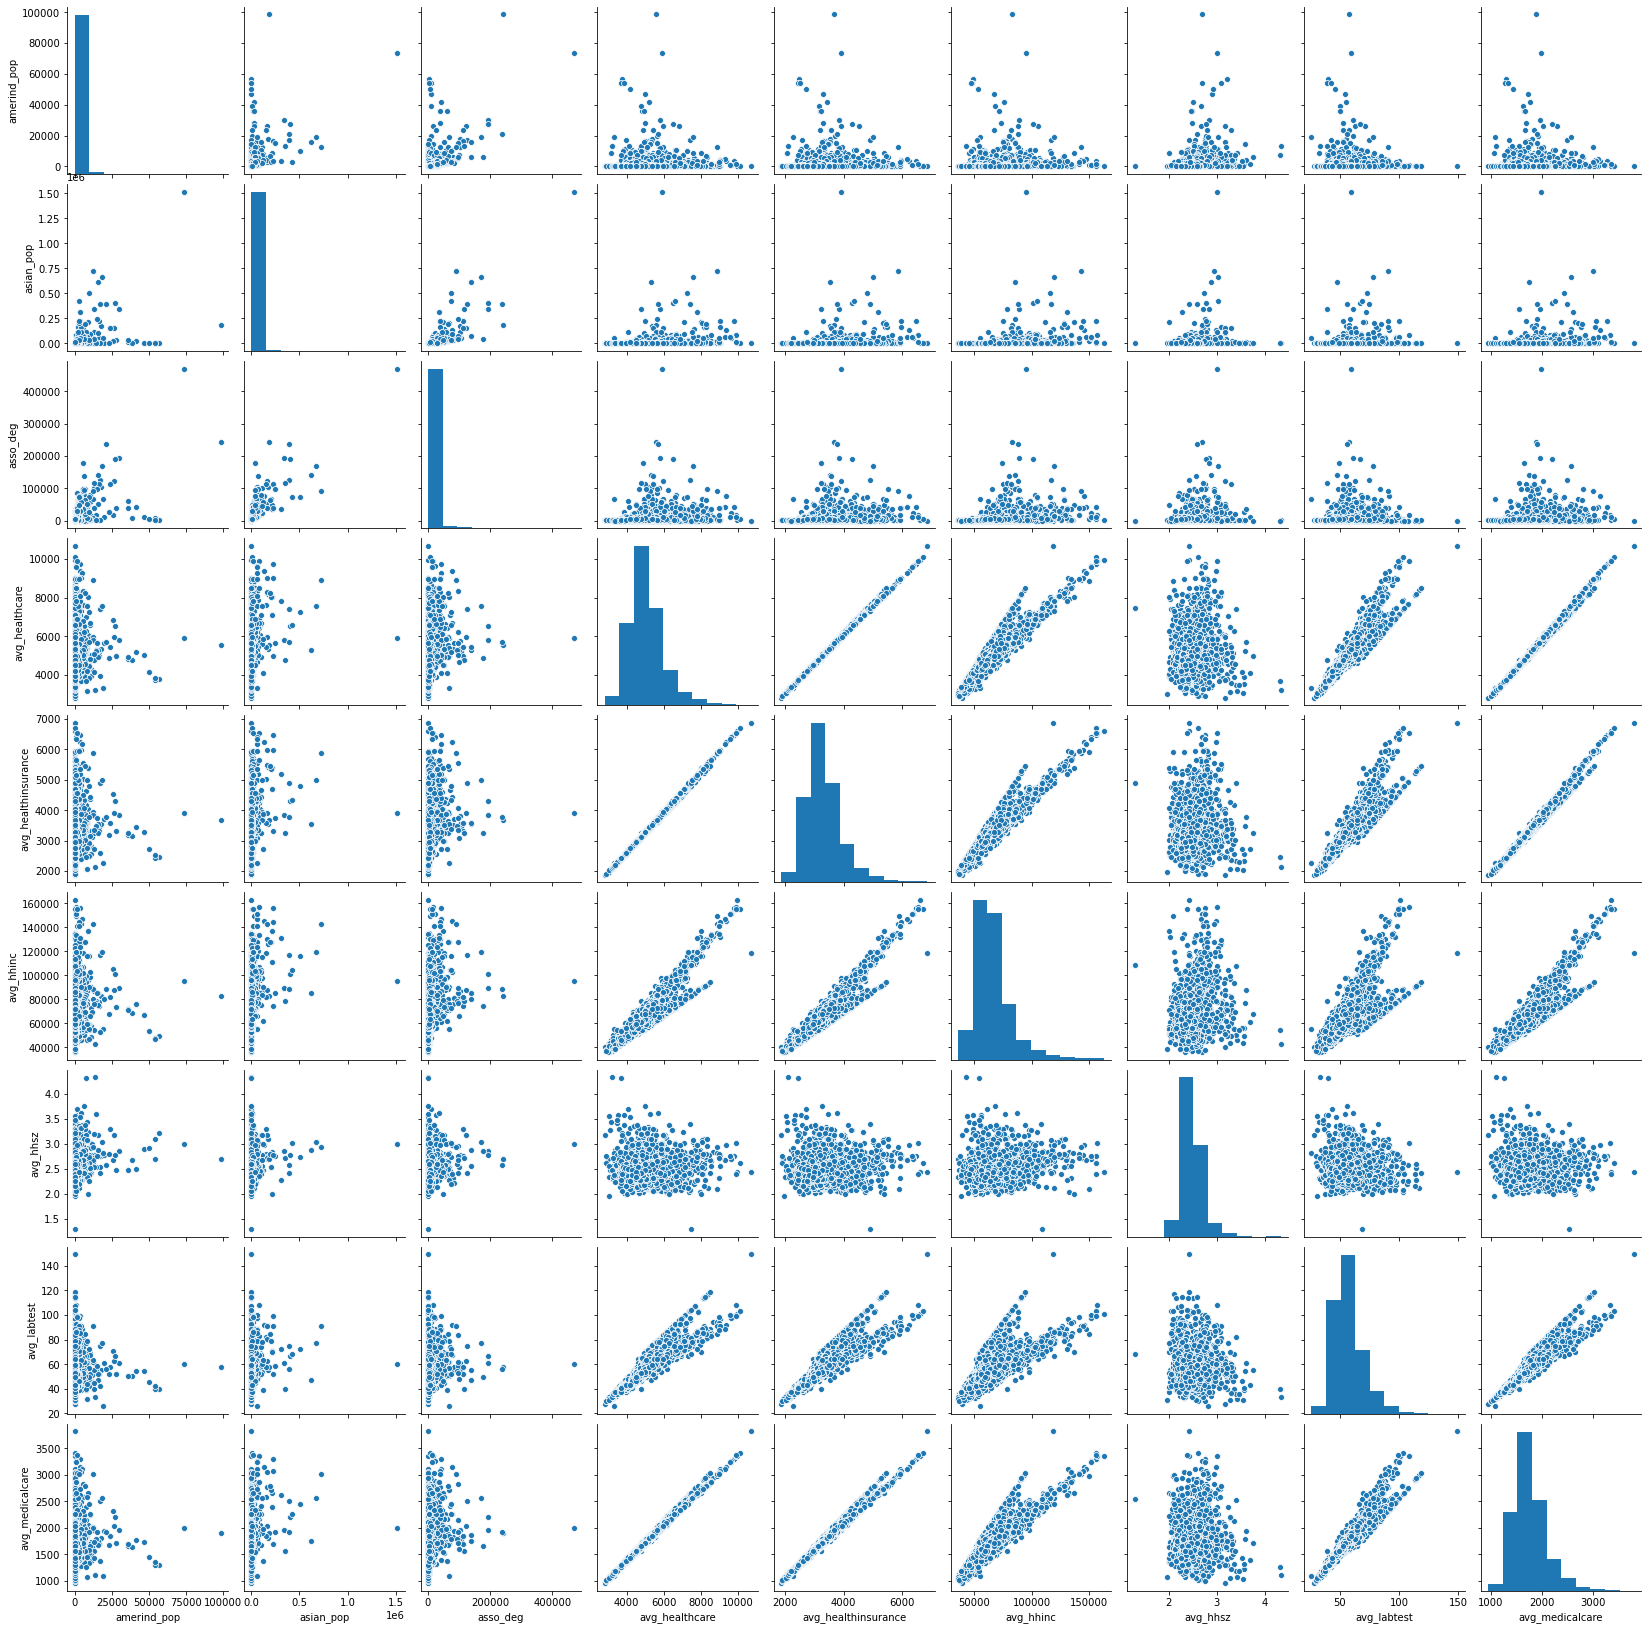

In [11]:
sns.pairplot(test_newcounty_df.iloc[:,0:9])

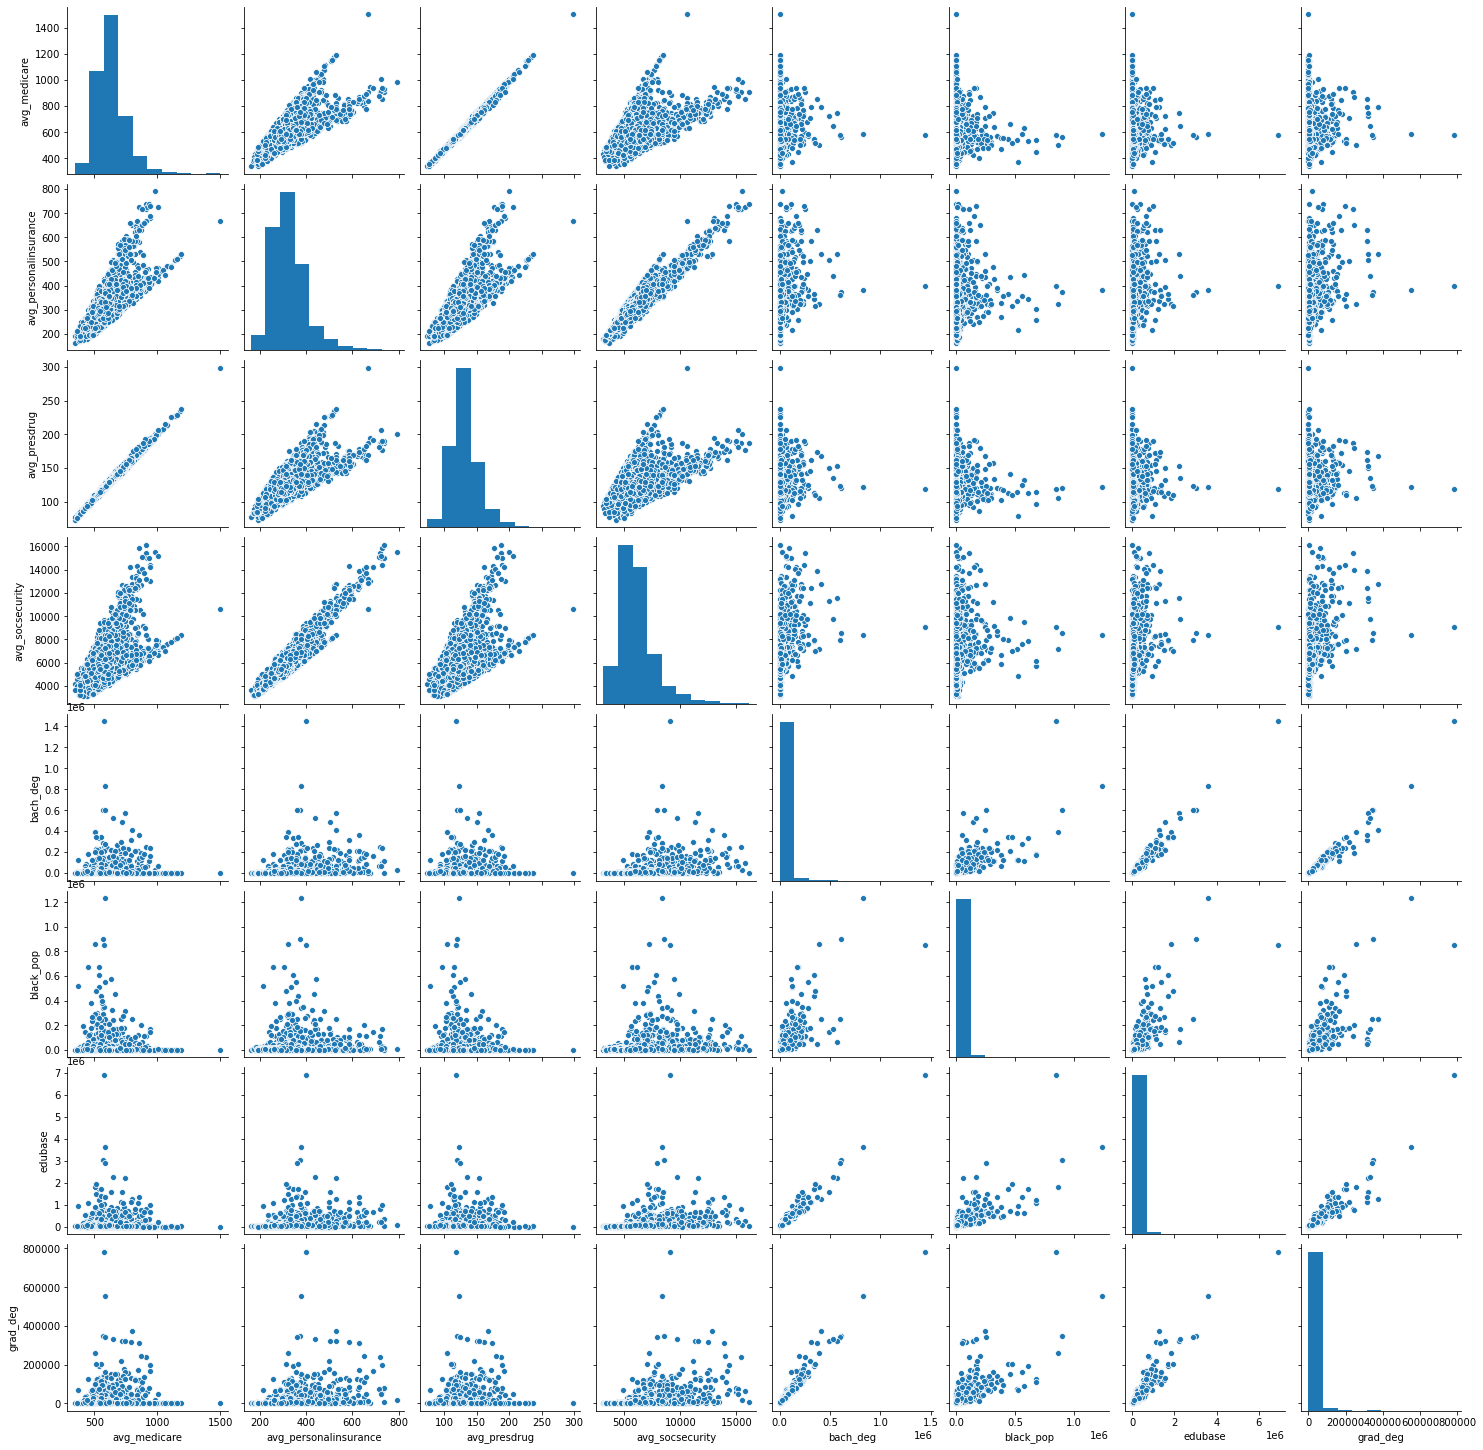

In [12]:
sns.pairplot(test_newcounty_df.iloc[:,10:19])

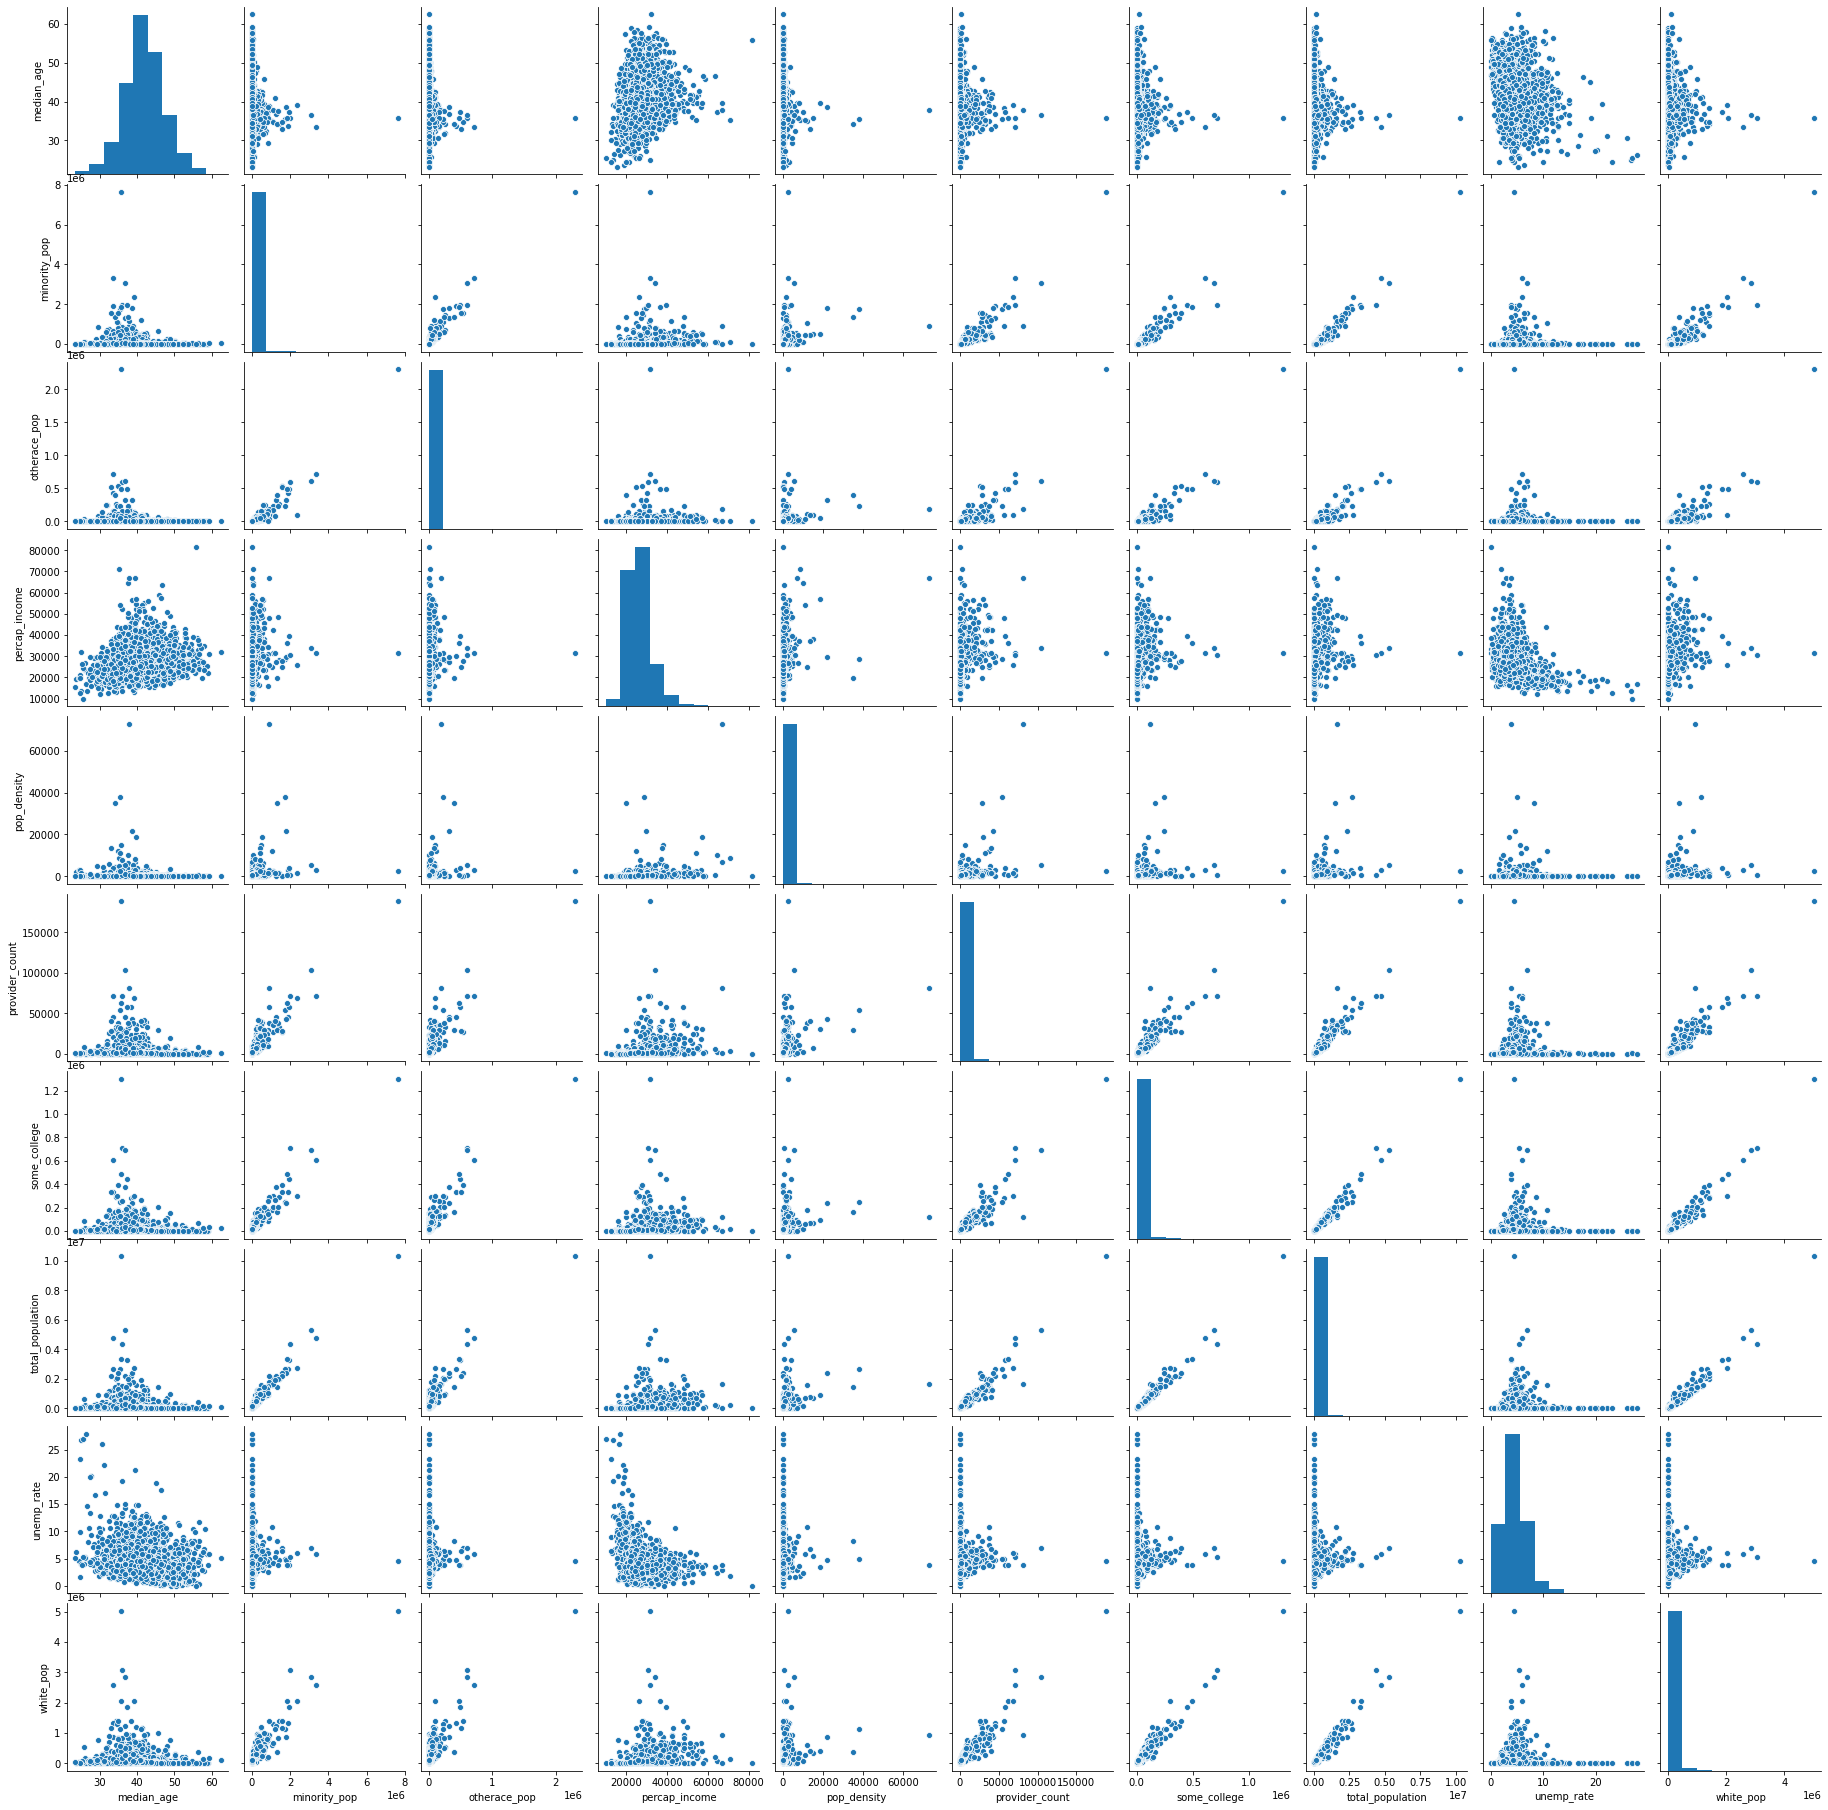

In [13]:
sns.pairplot(test_newcounty_df.iloc[:,20:])

From these pair plots we can see that:
 - Distribution of most variables is heavily right skewed
 - Some variables have outliers that influencing data distribution
 - Most demographic variables are not correlated to other demographic variables
 - Most health expenditure variables seem to be highly correlated to other health expenditure variables

#### Correlation Plot

Correlation plot is another great way to visualize correlation among predictor variables and correlation of predictors with response variable.

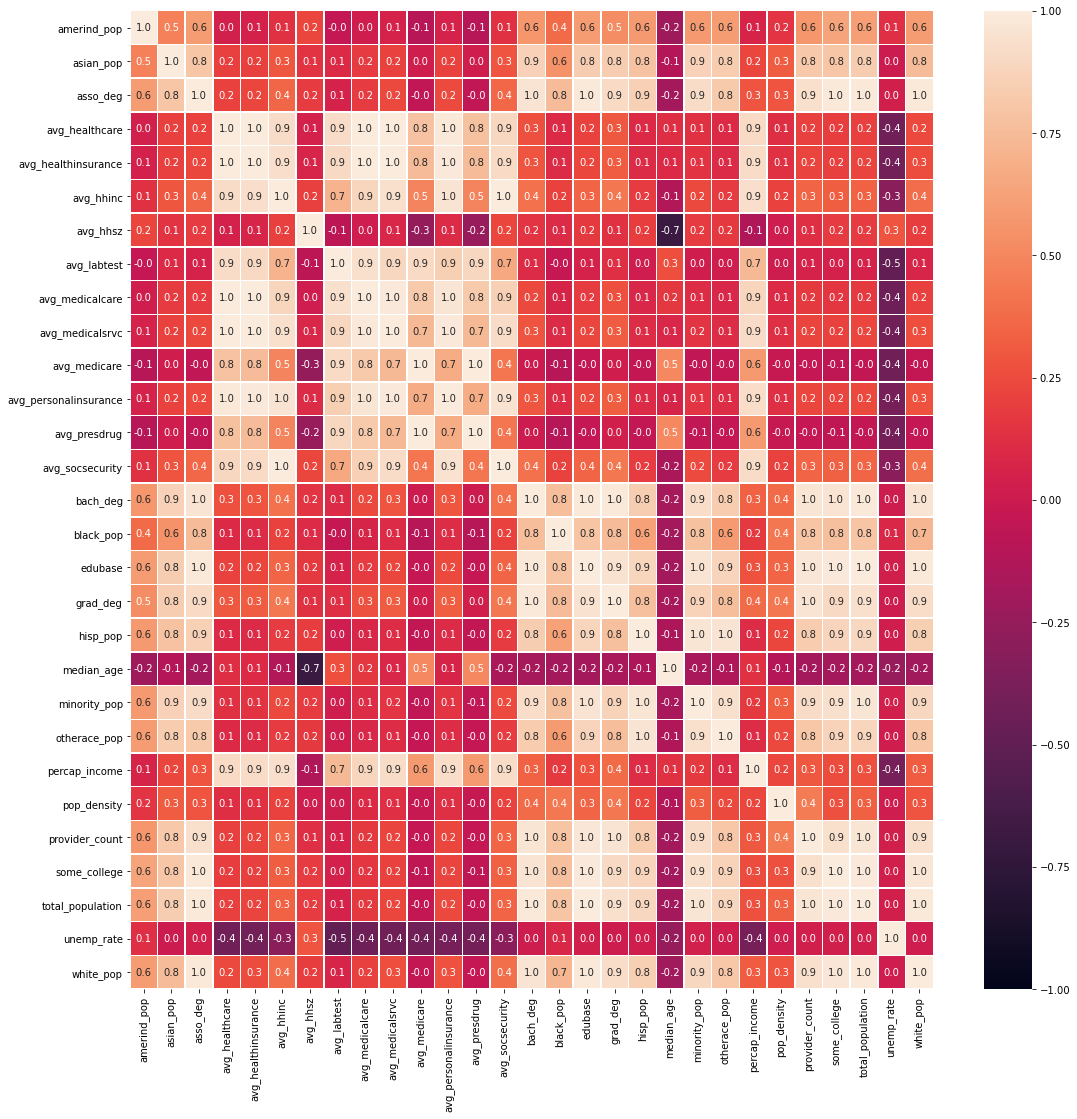

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(test_newcounty_df.corr(), vmin=-1.0, vmax=1.0, annot=True, 
            linewidths=.5, fmt= '.1f',ax=ax)

From this plot, we can see that:
 - Education level variables are highly correlated with each other.
 - Similarly, health expensiture variables also seem to be highly correlated.

In [15]:
# Sort the values by descending order of Provider Count
test_newcounty_df = test_newcounty_df.sort_values(by=['provider_count'], ascending=False)
test_newcounty_df.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
2631        73559    1517296    469649         5905.52              3907.44   
3029        21113     395712    237028         5692.87              3774.06   
1277         8756     212844     48360         8035.56              5382.10   
2528        98584     184150    241714         5574.19              3675.76   
531         30001     341640    193511         5800.32              3840.81   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
2631      94861      3.00        59.76          1998.08          1132.94   
3029      88254      2.58        56.05          1918.81          1061.74   
1277     136860      2.00        69.80          2653.46          1464.96   
2528      83005      2.69        57.84          1898.43          1041.69   
531       89252      2.85        60.64          1959.50          1087.37   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
2631        579.43                 399.93        118.60          9046.16   
3029        585.60                 381.05        122.50          8356.49   
1277        796.17                 530.01        167.61         12793.70   
2528        581.95                 362.02        123.67          7908.62   
531         564.48                 374.86        119.69          8547.08   

      bach_deg  black_pop              county  edubase  grad_deg  hisp_pop  \
2631   1445895     850350  Los Angeles County  6899087    782758   5043293   
3029    830433    1233716         Cook County  3607345    552050   1374256   
1277    406878     247085     New York County  1251653    371255    441304   
2528    597653     253576     Maricopa County  2891837    342159   1373153   
531     605813     901459       Harris County  3029538    345886   2035551   

      median_age  minority_pop  otherace_pop  percap_income  pop_density  \
2631        35.7       7644196       2305030          31563       2535.5   
3029        36.6       3078944        608672          34083       5579.2   
1277        37.9        899778        193191          66805      72736.2   
2528        35.8       1981147        598035          30701        476.9   
531         33.5       3339578        712410          31405       2780.1   

      provider_count  some_college state  total_population  unemp_rate  \
2631          188179       1300786    CA          10288937         4.5   
3029          104037        690225    IL           5274129         6.9   
1277           80839        121070    NY           1660472         3.9   
2528           71069        711033    AZ           4387226         5.3   
531            70953        606842    TX           4735852         5.9   

      white_pop  
2631    5019340  
3029    2859209  
1277     924396  
2528    3066684  
531     2573473

## Generate a Global Model

<a name="global"></a>
The idea behind a global model is to identify various socioeconomic and demographic factors that influence access to healthcare providers across all counties in the United States.

To build this global model, we will follow a 3 step process:
    1. Build an Ordinary Least Squares (OLS) Regression Model and verify regressions assumptions
    2. Perform Feature Selection using Lasso, Elastic Net and Recursive Feature Elimination techniques
    3. Using selected features, build another OLS model, check performance and verify assumptions

### Create Predictor and Response Variables

In [16]:
# Create prdictor and response variables
train_x = test_newcounty_df.drop(['county','state','provider_count'],axis=1)
train_x.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
2631        73559    1517296    469649         5905.52              3907.44   
3029        21113     395712    237028         5692.87              3774.06   
1277         8756     212844     48360         8035.56              5382.10   
2528        98584     184150    241714         5574.19              3675.76   
531         30001     341640    193511         5800.32              3840.81   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
2631      94861      3.00        59.76          1998.08          1132.94   
3029      88254      2.58        56.05          1918.81          1061.74   
1277     136860      2.00        69.80          2653.46          1464.96   
2528      83005      2.69        57.84          1898.43          1041.69   
531       89252      2.85        60.64          1959.50          1087.37   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
2631        579.43                 399.93        118.60          9046.16   
3029        585.60                 381.05        122.50          8356.49   
1277        796.17                 530.01        167.61         12793.70   
2528        581.95                 362.02        123.67          7908.62   
531         564.48                 374.86        119.69          8547.08   

      bach_deg  black_pop  edubase  grad_deg  hisp_pop  median_age  \
2631   1445895     850350  6899087    782758   5043293        35.7   
3029    830433    1233716  3607345    552050   1374256        36.6   
1277    406878     247085  1251653    371255    441304        37.9   
2528    597653     253576  2891837    342159   1373153        35.8   
531     605813     901459  3029538    345886   2035551        33.5   

      minority_pop  otherace_pop  percap_income  pop_density  some_college  \
2631       7644196       2305030          31563       2535.5       1300786   
3029       3078944        608672          34083       5579.2        690225   
1277        899778        193191          66805      72736.2        121070   
2528       1981147        598035          30701        476.9        711033   
531        3339578        712410          31405       2780.1        606842   

      total_population  unemp_rate  white_pop  
2631          10288937         4.5    5019340  
3029           5274129         6.9    2859209  
1277           1660472         3.9     924396  
2528           4387226         5.3    3066684  
531            4735852         5.9    2573473

In [17]:
train_y = test_newcounty_df['provider_count']
train_y.head()

2631    188179
3029    104037
1277     80839
2528     71069
531      70953
Name: provider_count, dtype: int64

### Create a Base Model
<a name="base"></a>

This is our first model where we will build an Ordinary Least Squares (OLS) Regression Model with all predictors and verify regressions assumptions

In [27]:
# Import libraries
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

# Set the seed for consistent results
np.random.seed(101)

#### Linear Regression Model using Stats Models

In [28]:
# Create Model
X_train = train_x
X_train = sm.add_constant(X_train) # add constant
sm_ols = sm.OLS(train_y, X_train).fit() 

In [29]:
# Generate model summary
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         provider_count   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3861.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:20:25   Log-Likelihood:                -26495.
No. Observations:                3142   AIC:                         5.305e+04
Df Residuals:                    3113   BIC:                         5.322e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2805.7276    834.908      3.361      0.001    1168.702    4442.753
amerind_pop              -0.0445      0.009     -5.224      0.000      -0.061      -0.028
asian_pop                -0.0843      0.006    -14.242      0.000      -0.096      -0.073
asso_deg                  0.0249      0.011      2.239      0.025       0.003       0.047
avg_healthcare          524.7066   3997.697      0.131      0.896   -7313.683    8363.096
avg_healthinsurance    -519.0505   3997.655     -0.130      0.897   -8357.359    7319.258
avg_hhinc                 0.2119      0.128      1.653      0.098      -0.039       0.463
avg_hhsz               -279.4851    242.318     -1.153      0.249    -754.605     195.635
avg_labtest            -116.1778     52.773     -2.201      0.028    -219.652     -12.704
avg_medicalcare        -513.3224   3998.138     -0.128      0.898   -8352.578    7325.933
avg_medicalsrvc          -6.0598     14.020     -0.432      0.666     -33.550      21.431
avg_medicare              7.6182     11.938      0.638      0.523     -15.790      31.026
avg_personalinsurance     0.4815      8.308      0.058      0.954     -15.809      16.772
avg_presdrug           -154.3437     63.511     -2.430      0.015    -278.871     -29.817
avg_socsecurity          -4.5531      1.429     -3.187      0.001      -7.354      -1.752
bach_deg                 -0.0006      0.004     -0.132      0.895      -0.009       0.008
black_pop                -0.0578      0.005    -12.151      0.000      -0.067      -0.048
edubase                   0.0582      0.004     16.427      0.000       0.051       0.065
grad_deg                  0.0800      0.005     17.451      0.000       0.071       0.089
hisp_pop                 -0.0895      0.012     -7.707      0.000      -0.112      -0.067
median_age              -46.6160      9.914     -4.702      0.000     -66.054     -27.178
minority_pop              0.0969      0.012      8.030      0.000       0.073       0.121
otherace_pop              0.0385      0.011      3.444      0.001       0.017       0.060
percap_income             0.0837      0.021      4.018      0.000       0.043       0.124
pop_density               0.3281      0.022     15.258      0.000       0.286       0.370
some_college             -0.0117      0.005     -2.329      0.020      -0.022      -0.002
total_population         -0.0628      0.010     -6.172      0.000      -0.083      -0.043
unemp_rate               -1.3652      9.930     -0.137      0.891     -20.835      18.104
white_pop                 0.0336      0.010      3.300      0.001       0.014       0.054
==============================================================================
Omnibus:                     1728.109   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarqu

Text(0.5, 1.0, 'Model Coefficients - Base Model')

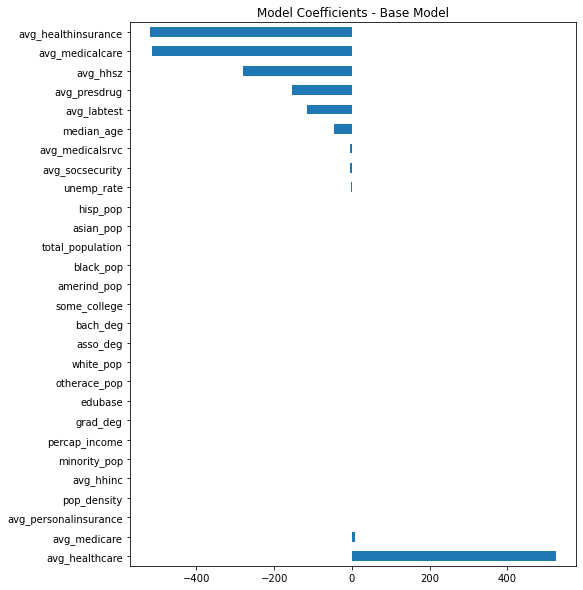

In [30]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
sm_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Base Model')

In [31]:
# Calculate RMSE of model

from statsmodels.tools.eval_measures import rmse
pred_val = sm_ols.fittedvalues.copy()
rmse_base_ols = rmse(train_y, pred_val)
print('RMSE for Base Model:',round(rmse_base_ols,2))

RMSE for Base Model: 1111.57


> Analysing the model summary, we can see that:
   - The R-squared value of 0.972 shows that 97.2% of the variability in Provider Count is explained by the model. The R-squared value is too good to be true and the model seems to be overfitting.
   - To identify variables that are statistically significant, we look at the p-values of individual variables. Among the coefficients, those that are statistically significant at 10% significance level are:  
   - asian_pop, amerind_pop, black_pop, edubase, hisp_pop, median_age, minority_pop, otherace_pop, percap_income, pop_density, white_pop, some_college, asso_deg, grad_deg, total_population, avg_labtest, avg_presdrug, avg_socsecurity.
   - The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.

#### Verify Assumptions

Here we will verify regression assumtions of:
 - Linearity
 - Independence
 - Normality
 - Equal Variance

In [32]:
# Get residual value
residual = sm_ols.resid

((array([-3.51414897, -3.271219  , -3.13692245, ...,  3.13692245,
          3.271219  ,  3.51414897]),
  array([-11785.13337262, -11448.1589106 , -10018.6757197 , ...,
          10440.58235921,  12485.40745444,  17770.11178584])),
 (804.0313438365284, -6.829331715432815e-08, 0.7225963263979862))

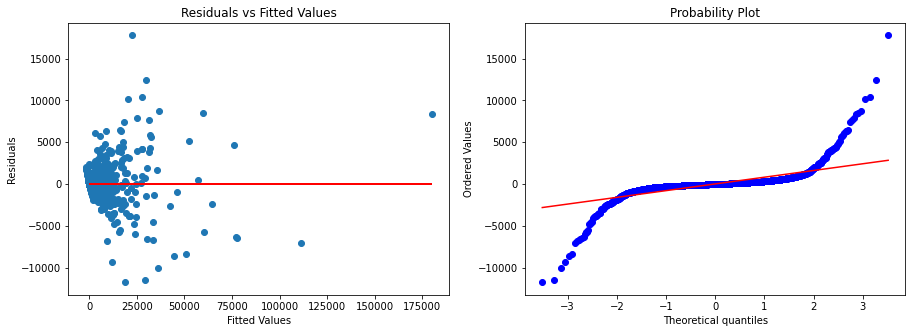

In [33]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=max(pred_val), linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we observe a departure from constant variance as the distance of data points from zero are not consistently equal. We can see that the residuals are closer to 0 in the beggining but values start to go up as we move a little towards the right of the plot.
    - **Independence**:  We see that the data is clustered together and is not randomly distributed. This indicates a departure from independence as clusters of residuals generally indicate correlation errors, or an indication that multicollinearity exists in parts of the data.


2. Probability Plot
    - **Normality**: From this plot, we can see that the residuals have tails on both the positive and negative side. Although the residuals stay close to the zero line they are heavily tailed showing violation of Normality assumption.


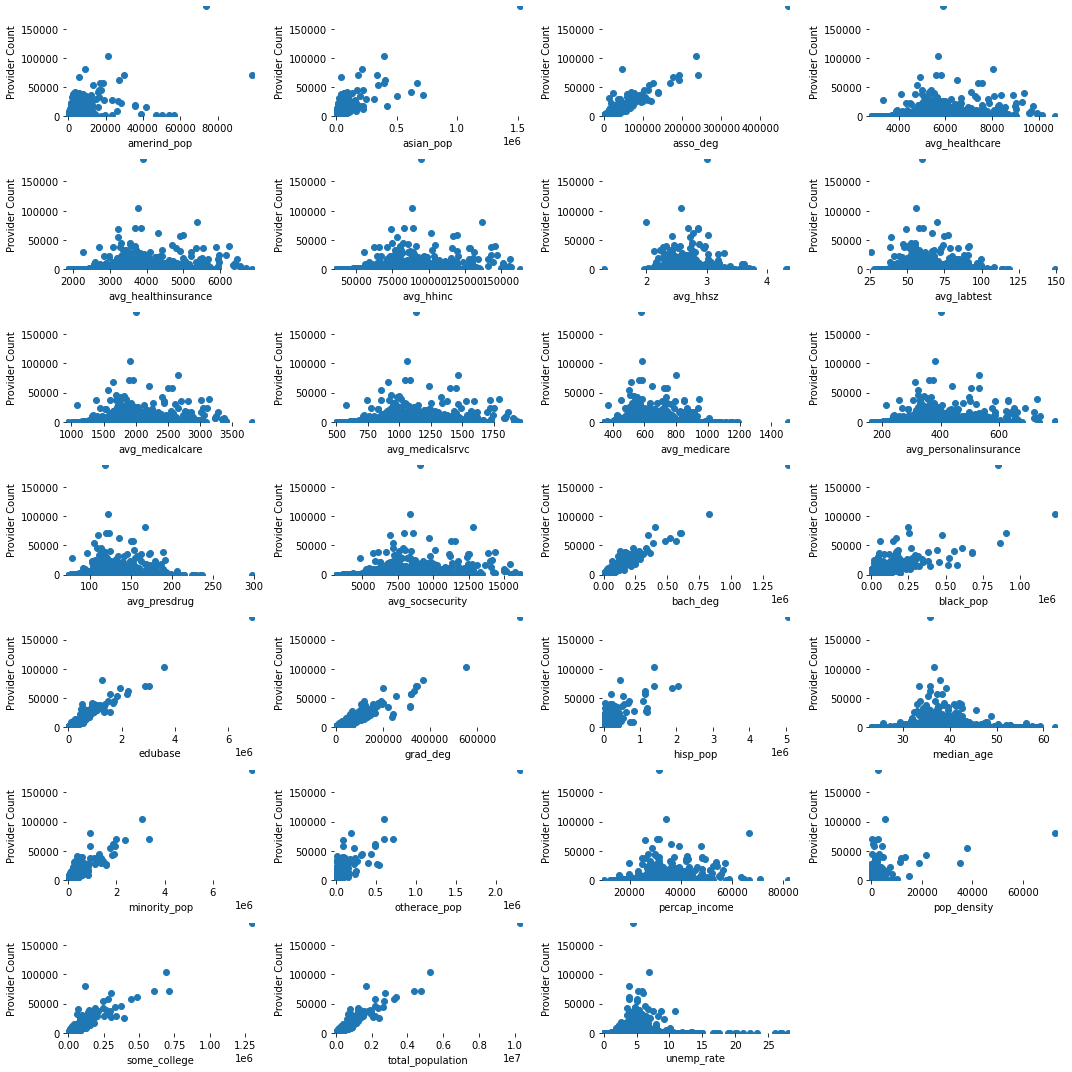

In [34]:
# Check Linearity - Plot predictors with response
states = train_x.columns
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x.loc[:,states[sp]], train_y)
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Predictors vs Response
     - **Linearity** - From the plot above, we can see the each predictor variable is either strongly or weakly related to response variable. From this plot, we can say that the Linearity assumption holds.

#### Outlier Detection

One way to think about whether the results we have are driven by a given data point is to calculate how far the predicted values for data would move if model was fit without the data point in question. This calculated total distance is called Cook's distance. Cook's D is a function of the leverage and standardized residual associated with each data point. The influence of each point can be visualized using an Influence Plot.

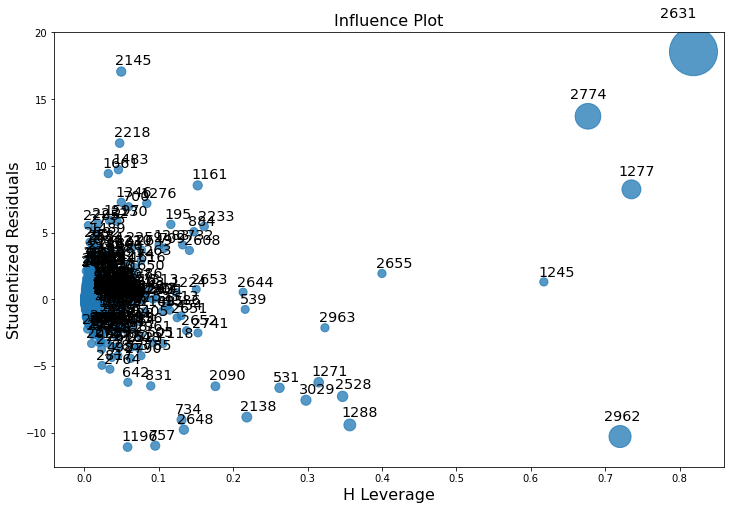

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(sm_ols, ax= ax, criterion="cooks")

From this plot, we can see that points with larger size have high leverage and higher than average residuals. The larger size of points indicates these are influential points. Points that do not have a high leverage but very high residual and are considered outliers.

#### Remove Outliers

Removing outliers is an iterative process and outliers need to be investigated before removal. Here, we followed a 4-step process to remove outliers as follows:
1. Remove initial outliers based on Influence Plot
2. Rerun the model with data after removing outliers
3. Plot predictors with response to see outliers in each predictor
4. Repeat the process above until you see satisfactory results

The outliers were removed in different iterations. Here are the obervations that were removed with each iteration:
    - Iteration 1: 2631,2774,1277,1245,2962
    - Iteration 2: 1271,2145,2528,2138,1288
    - Iteration 3: 2653,2644,2655,3029,539,531,2963,2961,757,2961
    - Iteration 4: 2090,2608,2218,2648,1196,454,493,1161
    - Iteration 5: 195,2741,884,495,2732,2651,2652,505,1661,1483,734
    
The code below shows all outliers being removed. If you see a different set of points as outliers for your analysis, update the `global_df.drop()` command in code cell below with outlier observations and run the analysis.

In [60]:
# Remove Outliers
global_df = test_newcounty_df.copy()

global_df.drop([2631,2774,1277,1245,2962,
                1271,2145,2528,2138,1288,
               2653,2644,2655,3029,539,531,2963,2961,757,2961,
               2090,2608,2218,2648,1196,454,493,1161,
               195,2741,884,495,2732,2651,2652,505,1661,1483,734], axis=0, inplace=True)

In [61]:
global_df.shape

(3104, 31)

##### Re-run Model

In [62]:
# Create prdictor and response variables
train_x_rerun = global_df.drop(['county','state','provider_count'],axis=1)
train_y_rerun = global_df['provider_count']
train_x_rerun.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
1276         3725     135762     76632         9378.63              6234.59   
2233         7296      61221     98936         4689.91              3086.87   
1283         5873      63150     97865         8357.34              5537.92   
1346         3139      69531     59352         5092.24              3363.94   
1650         1861      49510     85068         5651.21              3719.02   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
1276     145668      2.98        91.54          3144.04          1787.46   
2233      65667      2.53        48.09          1603.03           855.71   
1283     127434      2.95        84.12          2819.42          1593.74   
1346      76679      2.39        52.43          1728.29           945.65   
1650      80920      2.22        57.87          1932.19          1042.79   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
1276        941.09                 730.00        189.67         14346.36   
2233        537.30                 304.12        114.89          6106.46   
1283        848.71                 629.87        172.25         12508.96   
1346        522.90                 328.65        110.91          7257.97   
1650        634.30                 377.02        133.94          7618.78   

      bach_deg  black_pop  edubase  grad_deg  hisp_pop  median_age  \
1276    239124     168075   966722    198145    242411        42.4   
2233    170261     675982  1200479    112071    108064        38.8   
1283    207071     121952  1060001    173811    305129        41.3   
1346    214996     296185   849022    124594     72525        34.9   
1650    219168     165407   891439    151997     27470        42.7   

      minority_pop  otherace_pop  percap_income  pop_density  some_college  \
1276        564546         93346          48459       4805.5        146621   
2233        891604         37661          25903       2887.9        294896   
1283        507258        103330          42729       1660.4        181490   
1346        480330         34855          31611       2431.7        170169   
1650        271073          6977          35858       1693.9        142060   

      total_population  unemp_rate  white_pop  
1276           1368213         5.4     926489  
2233           1767643         8.7     932737  
1283           1514342         5.3    1175867  
1346           1294124         4.5     843065  
1650           1236649         5.5     982008

In [63]:
# Run Model
X_train_rerun = train_x_rerun
X_train_rerun = sm.add_constant(X_train_rerun)
global_ols_rerun = sm.OLS(train_y_rerun, X_train_rerun).fit() 
residual = global_ols_rerun.resid

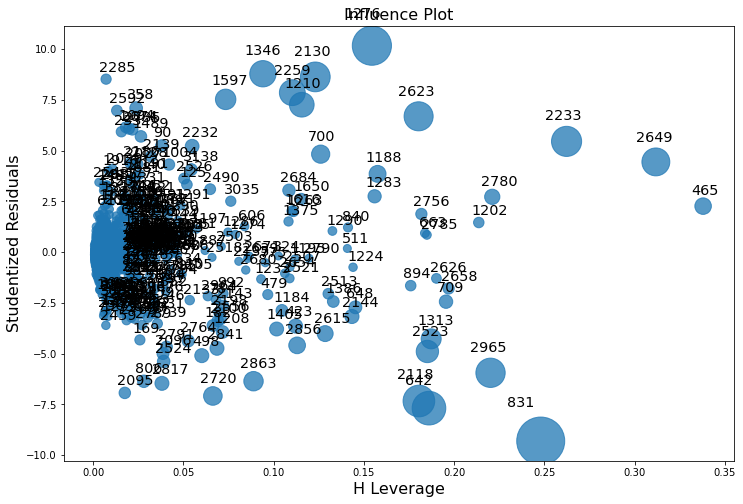

In [64]:
# Plot Outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(global_ols_rerun, ax= ax, criterion="cooks")

Comparing this influece plot to the original plot before removing outliers, we can see that the range for `H Leverage` has considerable reduced from `0.0-0.8 to 0.0-0.35`. The range for `Studentized Residuals` has also reduced from `-12.0-20.0 to -10.0-11.0`.

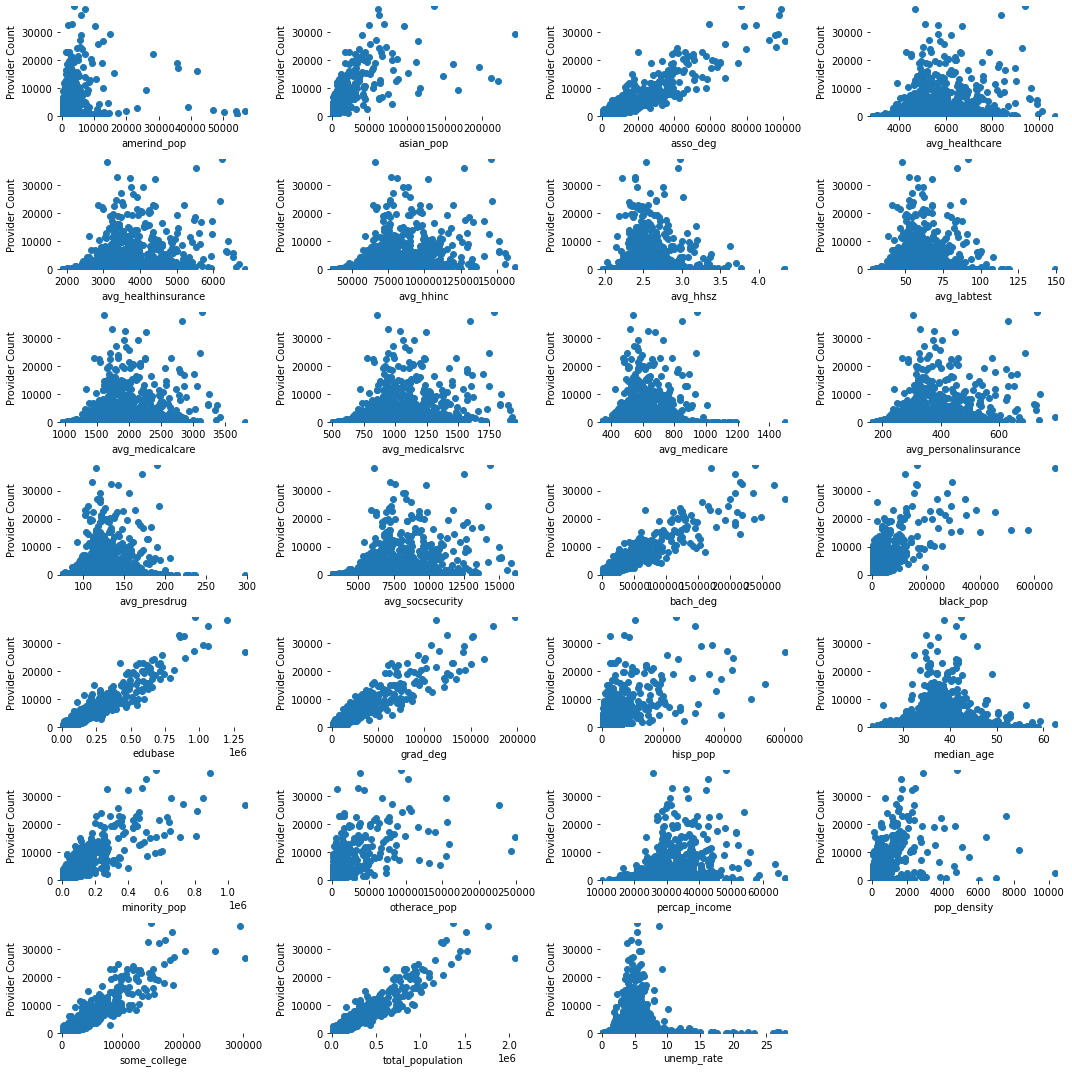

In [65]:
# Check Linearity - Plot predictors with response
states = train_x_rerun.columns
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x_rerun.loc[:,states[sp]], train_y_rerun)
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

### Feature Selection and Importance

<a name="feature"></a>
Our regression model results showed only few predictors that were statistically significant in predicting provider count. Feature selection is used to select those features in data that contribute most to the response variable. Having irrelevant features in the data can decrease the accuracy of many models, especially linear algorithms. To identify which predictors play a key role and remove predictors that are not statistically significant, we can use various feature selection techniques.

Greedy algorithms like `Stepwise Regression` and `Recursive Feature Elimination (RFE)` work by adding or removing attributes one at a time and building a model on those attributes that remain. RFE algorithm recursively removes attributes and uses accuracy metric to rank the feature according to their importance.

Regularization methods like `Lasso` and `ElasticNet` seek to minimize the complexity (magnitude  and  number  of  regression  coefficients) of the model by penalizing a feature given a coefficient threshold.
 - LASSO penalizes the sum of absolute value of regression coefficients thereby forcing many coefficients to 0.
 
 - ElasticNet combines the properties of both LASSO and Ridge regression.  It penalizes the model by using both the L2-norm (sum of squared values of coefficients) and the L1-norm (sum of absolute value of coefficients) thereby shrinking some coefficients closer to 0 to reduce variance and making other coefficients 0.
 
Feature importance techniques like `Random Forest` are used to select features using a trained supervised classifier. Random forest consists of a number of decision trees where each node in a tree is a condition on a single feature, designed to split the dataset.

Here we will:
 - Run some feature selection algorithms
 - Choose an algorithm with lowest error
 - Run the chosen algorithm on all predictors
 - Choose the predictors selected by this model for further analysis

In [66]:
# Create prdictor and response variables
train_x_global = train_x_rerun
train_y_global = train_y_rerun
train_x_global.head()

amerind_pop  asian_pop  asso_deg  avg_healthcare  avg_healthinsurance  \
1276         3725     135762     76632         9378.63              6234.59   
2233         7296      61221     98936         4689.91              3086.87   
1283         5873      63150     97865         8357.34              5537.92   
1346         3139      69531     59352         5092.24              3363.94   
1650         1861      49510     85068         5651.21              3719.02   

      avg_hhinc  avg_hhsz  avg_labtest  avg_medicalcare  avg_medicalsrvc  \
1276     145668      2.98        91.54          3144.04          1787.46   
2233      65667      2.53        48.09          1603.03           855.71   
1283     127434      2.95        84.12          2819.42          1593.74   
1346      76679      2.39        52.43          1728.29           945.65   
1650      80920      2.22        57.87          1932.19          1042.79   

      avg_medicare  avg_personalinsurance  avg_presdrug  avg_socsecurity  \
1276        941.09                 730.00        189.67         14346.36   
2233        537.30                 304.12        114.89          6106.46   
1283        848.71                 629.87        172.25         12508.96   
1346        522.90                 328.65        110.91          7257.97   
1650        634.30                 377.02        133.94          7618.78   

      bach_deg  black_pop  edubase  grad_deg  hisp_pop  median_age  \
1276    239124     168075   966722    198145    242411        42.4   
2233    170261     675982  1200479    112071    108064        38.8   
1283    207071     121952  1060001    173811    305129        41.3   
1346    214996     296185   849022    124594     72525        34.9   
1650    219168     165407   891439    151997     27470        42.7   

      minority_pop  otherace_pop  percap_income  pop_density  some_college  \
1276        564546         93346          48459       4805.5        146621   
2233        891604         37661          25903       2887.9        294896   
1283        507258        103330          42729       1660.4        181490   
1346        480330         34855          31611       2431.7        170169   
1650        271073          6977          35858       1693.9        142060   

      total_population  unemp_rate  white_pop  
1276           1368213         5.4     926489  
2233           1767643         8.7     932737  
1283           1514342         5.3    1175867  
1346           1294124         4.5     843065  
1650           1236649         5.5     982008

In [67]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### Run Feature Selection Algorithms

In [68]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [69]:
# Create Pipeline and Standardize the dataset
clf = LinearRegression()
pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso(max_iter=10000))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledRFECV', Pipeline([('Scaler', StandardScaler()),('RFECV',RFECV(estimator=clf, cv=5))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators = 100))])))

In [70]:
# Run models
import math
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, train_x_global, train_y_global, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)

ScaledLASSO: 771.738241 (207825.575938)
ScaledEN: 938.678204 (343189.835918)
ScaledRFECV: 823.889149 (247099.449463)
ScaledRF: 811.896718 (380144.287094)


From the results above, Lasso seems to be the most promising with lowest RMSE. Let's explore Lasso to see which variables are selected by this model.

#### Identify Features Using Lasso

In [71]:
# Standardize the data using Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x_global)

In [72]:
# Run Lasso Model
from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
lasso_model=Lasso(max_iter=10000)
lasso_model.fit(train_x_std,train_y_global)

Lasso(max_iter=10000)

In [73]:
# Identify how many variables are picked
coef = pd.Series(lasso_model.coef_, index = train_x.columns)
print("Model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Model picked 21 variables and eliminated the other 7 variables


In [74]:
# Get important variables and their coefficients
imp_coef = pd.concat([coef.sort_values(ascending=False).head(10),
                     coef.sort_values(ascending=False).tail(10)])
imp_coef

minority_pop        4454.850123
grad_deg            2502.249910
total_population    1554.490182
avg_medicare         585.164621
percap_income        577.057038
asso_deg             520.586167
edubase              504.018731
otherace_pop         160.196775
pop_density          130.231853
avg_hhsz              25.543259
unemp_rate           -42.119194
amerind_pop          -72.140743
median_age          -171.378575
some_college        -185.288633
avg_presdrug        -533.385372
avg_socsecurity     -855.327998
asian_pop          -1069.862415
bach_deg           -1409.681733
black_pop          -1935.374260
hisp_pop           -2462.771499
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Model')

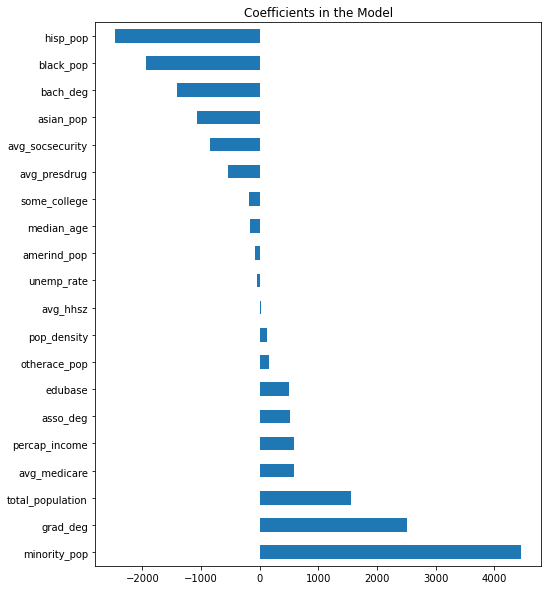

In [75]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

From the analysis above, we can see that factors that are predictive of higher provider count are:
- minority_pop (2018 Minority Population (Esri))
- grad_deg (2018 Education: Graduate/Professional Degree (Esri))
- total_population (2018 Total Population (Esri))
- percap_income (2018 Per Capita Income (Esri))
- avg_medicare (2019 Medicare Payments: Average)
- asso_deg (2018 Education: Associate's Degree (Esri))
- edubase (2018 Educational Attainment Base (Esri))
- otherace_pop (2018 Other Race Population by Age Base (Esri))
- pop_density (2018 Population Density (Pop per Square Mile) (Esri))
- avg_hhsz (2018 Average Household Size (Esri))

Factors that negatively influence provider count are:
- hisp_pop (2018 Hispanic Population (Esri))
- black_pop (2018 Black/African American Population (Esri))
- bach_deg (2018 Education: Bachelor's Degree (Esri))
- asian_pop (2018 Asian Population (Esri))
- avg_socsecurity (2019 Pensions & Social Security: Average)
- avg_presdrug (2019 Prescription Drugs: Average)
- median_age (2018 Median Age (Esri))
- some_college (2018 Education: Some College/No Degree (Esri))
- amerind_pop (2018 American Indian/Alaska Native Population (Esri))
- unemp_rate (2018 Unemployment Rate (Esri))

### Regression with Selected Features

<a name="reg"></a>
In the base model, we saw deviations from linearity, constant variance and independence assumptions. The model also seemed to overfit data with an R-squared value of 0.97. 

__For Linearity__ - If a model does not fit well, it does not mean that the regression is not useful. One problem could be that the relation between one or more predictors and the response is not linear.

__For Constant Variance and Independence__ - If normality or the constant variance do not hold, then we transform the response variable. A common transformation is the power transformation of y to the lambda, also called the Box-Cox transformation.

Here we will use the features selected by lasso model, and transform both the predictor and response to create a regression model on our data.

#### Clean the Data
Some transformations such as `log` do not work well with zero or negative values. We do not have any negatives but let's check and remove any zero values from the data.

In [76]:
# Create a copy of dataframe
test_log = global_df.copy()
test_log.shape

(3104, 31)

In [77]:
# Describe to identify any zero values in dataset
test_log.describe().transpose()

count          mean            std       min  \
amerind_pop            3104.0    865.785116    3067.789091      0.00   
asian_pop              3104.0   3084.911082   13454.317823      0.00   
asso_deg               3104.0   4941.285760    9925.381010      5.00   
avg_healthcare         3104.0   5075.712523     946.195699   2821.51   
avg_healthinsurance    3104.0   3316.689249     623.966546   1871.50   
avg_hhinc              3104.0  66023.111147   15666.739861  36078.00   
avg_hhsz               3104.0      2.482626       0.216742      1.96   
avg_labtest            3104.0     57.223283      12.382014     27.75   
avg_medicalcare        3104.0   1759.023273     323.858195    950.01   
avg_medicalsrvc        3104.0    926.152384     185.839987    496.89   
avg_medicare           3104.0    628.434604     110.569385    342.05   
avg_personalinsurance  3104.0    326.536279      74.809161    162.69   
avg_presdrug           3104.0    131.277639      21.051454     73.65   
avg_socsecurity        3104.0   6102.436150    1635.643929   3121.71   
bach_deg               3104.0  10563.097294   26694.372003      2.00   
black_pop              3104.0  10235.081186   36389.329364      0.00   
edubase                3104.0  55863.209407  115024.811672     69.00   
grad_deg               3104.0   6408.289626   17098.654547      0.00   
hisp_pop               3104.0  10820.092461   38434.673268      0.00   
median_age             3104.0     41.988048       5.353516     23.20   
minority_pop           3104.0  26540.396907   78146.533494      4.00   
otherace_pop           3104.0   4109.089240   14920.341955      0.00   
percap_income          3104.0  26316.543170    6036.700363   9853.00   
pop_density            3104.0    184.496778     551.821292      0.00   
provider_count         3104.0   1348.741946    3462.622614      0.00   
some_college           3104.0  11746.194588   23690.852566     22.00   
total_population       3104.0  81755.420103  169544.911392     82.00   
unemp_rate             3104.0      4.611566       2.549889      0.00   
white_pop              3104.0  60824.990335  115539.626365     65.00   

                              25%        50%         75%         max  
amerind_pop               60.7500    159.000    516.0000    56871.00  
asian_pop                 48.0000    160.000    785.0000   244129.00  
asso_deg                 644.7500   1583.500   4389.5000   101287.00  
avg_healthcare          4436.1775   4925.955   5558.0875    10690.41  
avg_healthinsurance     2898.7700   3221.335   3629.3875     6873.42  
avg_hhinc              55817.2500  63394.500  72044.7500   162801.00  
avg_hhsz                   2.3500      2.460      2.5700        4.34  
avg_labtest               49.0025     54.785     63.1425      149.41  
avg_medicalcare         1540.6900   1705.000   1920.5625     3816.99  
avg_medicalsrvc          799.9275    896.840   1020.5325     1955.37  
avg_medicare             557.3000    610.385    682.2950     1501.33  
avg_personalinsurance    276.2575    315.110    361.8400      791.45  
avg_presdrug             117.9000    128.380    141.7350      298.34  
avg_socsecurity         5049.7750   5807.285   6709.2450    16133.33  
bach_deg                 845.5000   2102.500   6409.0000   285839.00  
black_pop                119.7500    821.000   5462.7500   675982.00  
edubase                 7872.5000  18310.500  46166.2500  1334604.00  
grad_deg                 417.7500   1124.500   3691.2500   198145.00  
hisp_pop                 374.7500   1112.500   5108.0000   602482.00  
median_age                38.8000     41.900     45.2000       62.50  
minority_pop            1264.5000   4428.000  14899.5000  1106776.00  
otherace_pop             108.0000    416.500   1936.2500   248928.00  
percap_income          22209.2500  25444.500  29224.0000    66766.00  
pop_density               16.9000     45.200    113.0500    10328.30  
provider_count            87.0000    259.000    911.7500    39246.00  
some_college     

We can see that the minimum for asian, black population and some other variables is 0. Let's find out the observations with these zero values and remove them.

In [78]:
# Find observations that have 0 values
state_list = ['asian_pop','black_pop','amerind_pop','hisp_pop','otherace_pop','pop_density','unemp_rate','grad_deg']
x = test_log[(test_log[state_list] == 0).any(axis=1)]
x.shape

(51, 31)

We can see that 51 out of 3104 observations have 0 values. We will go ahead and remove these.

Replace 0 values with Nan and then drop those values

In [79]:
# Replace 0 with NaN for columns in state_list
test_log[state_list] = test_log[state_list].replace({0:np.nan})
test_log.dropna(inplace=True)
test_log.shape

(3053, 31)

In [80]:
test_log.describe().transpose()

count          mean            std       min  \
amerind_pop            3053.0    878.108745    3090.962447      1.00   
asian_pop              3053.0   3136.368818   13560.322340      1.00   
asso_deg               3053.0   5022.128071    9988.061791      5.00   
avg_healthcare         3053.0   5067.676187     937.283181   2821.51   
avg_healthinsurance    3053.0   3312.116056     618.982083   1871.50   
avg_hhinc              3053.0  66042.321978   15673.240720  36078.00   
avg_hhsz               3053.0      2.485565       0.214951      1.96   
avg_labtest            3053.0     56.979666      12.038334     27.75   
avg_medicalcare        3053.0   1755.560134     319.852053    950.01   
avg_medicalsrvc        3053.0    924.701186     184.446267    496.89   
avg_medicare           3053.0    626.228696     107.500580    342.05   
avg_personalinsurance  3053.0    326.188595      74.608657    162.69   
avg_presdrug           3053.0    130.895149      20.510952     73.65   
avg_socsecurity        3053.0   6106.953151    1638.240842   3121.71   
bach_deg               3053.0  10737.046184   26882.239613     20.00   
black_pop              3053.0  10405.498198   36667.999735      1.00   
edubase                3053.0  56778.575827  115761.708315    276.00   
grad_deg               3053.0   6514.322306   17221.061581     11.00   
hisp_pop               3053.0  10998.612512   38729.413174      2.00   
median_age             3053.0     41.887717       5.289915     23.20   
minority_pop           3053.0  26978.419915   78722.551307     14.00   
otherace_pop           3053.0   4176.994104   15035.147975      1.00   
percap_income          3053.0  26286.747134    6020.446911   9853.00   
pop_density            3053.0    187.541140     555.905239      0.10   
provider_count         3053.0   1371.067475    3487.084480      0.00   
some_college           3053.0  11938.186047   23840.942229     42.00   
total_population       3053.0  83096.434327  170635.035744    406.00   
unemp_rate             3053.0      4.632951       2.525602      0.10   
white_pop              3053.0  61820.407141  116241.720220    205.00   

                            25%       50%       75%         max  
amerind_pop               64.00    165.00    527.00    56871.00  
asian_pop                 51.00    166.00    806.00   244129.00  
asso_deg                 681.00   1633.00   4467.00   101287.00  
avg_healthcare          4434.05   4919.42   5551.25    10125.26  
avg_healthinsurance     2895.08   3218.30   3625.90     6711.29  
avg_hhinc              55843.00  63434.00  72087.00   162801.00  
avg_hhsz                   2.36      2.46      2.57        4.34  
avg_labtest               48.93     54.72     62.82      118.65  
avg_medicalcare         1539.20   1703.87   1917.95     3413.96  
avg_medicalsrvc          799.60    895.55   1018.32     1930.73  
avg_medicare             556.02    608.60    679.81     1192.23  
avg_personalinsurance    276.06    314.97    361.64      791.45  
avg_presdrug             117.76    128.12    141.46      236.92  
avg_socsecurity         5053.11   5814.95   6719.42    16133.33  
bach_deg                 893.00   2174.00   6614.00   285839.00  
black_pop                132.00    876.00   5589.00   675982.00  
edubase                 8361.00  18742.00  47339.00  1334604.00  
grad_deg                 440.00   1179.00   3819.00   198145.00  
hisp_pop                 392.00   1167.00   5238.00   602482.00  
median_age                38.80     41.80     45.00       62.50  
minority_pop            1345.00   4595.00  15271.00  1106776.00  
otherace_pop             116.00    434.00   2012.00   248928.00  
percap_income          22170.00  25428.00  29227.00    66766.00  
pop_density               18.10     46.40    115.00    10328.30  
provider_count            93.00    272.00    947.00    39246.00  
some_college            1738.00   3911.00  10251.00   303602.00  
total_population       11784.00  26721.00  67958.00  2071433.00  
unemp_rate     

Now that 0 valued observations are removed, we can see that minimum value is not 0.

#### Transform Data

In [81]:
# Subset important predictors chosen from Lasso Model
train_x_lasso = test_log.loc[:,imp_coef.index]
train_y_lasso = test_log['provider_count']
train_x_lasso.head()

minority_pop  grad_deg  total_population  avg_medicare  percap_income  \
1276        564546  198145.0           1368213        941.09          48459   
2233        891604  112071.0           1767643        537.30          25903   
1283        507258  173811.0           1514342        848.71          42729   
1346        480330  124594.0           1294124        522.90          31611   
1650        271073  151997.0           1236649        634.30          35858   

      asso_deg  edubase  otherace_pop  pop_density  avg_hhsz  unemp_rate  \
1276     76632   966722       93346.0       4805.5      2.98         5.4   
2233     98936  1200479       37661.0       2887.9      2.53         8.7   
1283     97865  1060001      103330.0       1660.4      2.95         5.3   
1346     59352   849022       34855.0       2431.7      2.39         4.5   
1650     85068   891439        6977.0       1693.9      2.22         5.5   

      amerind_pop  median_age  some_college  avg_presdrug  avg_socsecurity  \
1276       3725.0        42.4        146621        189.67         14346.36   
2233       7296.0        38.8        294896        114.89          6106.46   
1283       5873.0        41.3        181490        172.25         12508.96   
1346       3139.0        34.9        170169        110.91          7257.97   
1650       1861.0        42.7        142060        133.94          7618.78   

      asian_pop  bach_deg  black_pop  hisp_pop  
1276   135762.0    239124   168075.0  242411.0  
2233    61221.0    170261   675982.0  108064.0  
1283    63150.0    207071   121952.0  305129.0  
1346    69531.0    214996   296185.0   72525.0  
1650    49510.0    219168   165407.0   27470.0

In [82]:
# Transform data
from numpy import log
sc_data = StandardScaler()
train_x_log = np.log(train_x_lasso)
train_y_log = np.log(test_log.iloc[:,-1])

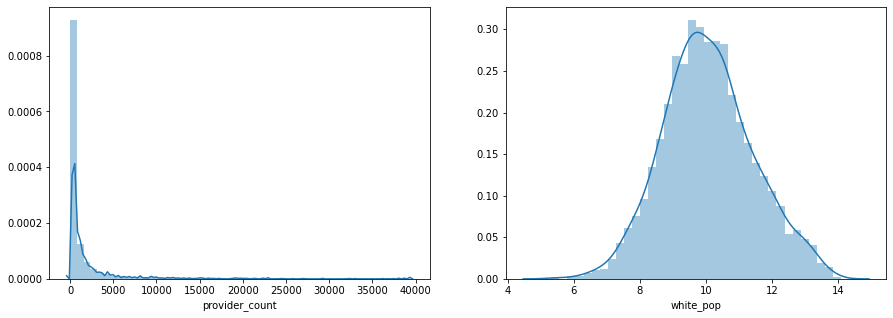

In [83]:
# Distribution of Dependent variable before and after transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_y_log, ax=ax2)
sns.distplot(train_y_lasso, ax=ax1)

From the plots above, we can see how the distribution of provider count varies before and after log transformation.

#### Run Global Model

In this model, we will build an Ordinary Least Squares (OLS) Regression Model using predictors selected from feature selection

In [84]:
X_train_log = sm.add_constant(train_x_log)
global_ols = sm.OLS(train_y_log, X_train_log).fit() 

In [85]:
global_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              white_pop   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.415e+04
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:01:24   Log-Likelihood:                 1642.8
No. Observations:                3053   AIC:                            -3244.
Df Residuals:                    3032   BIC:                            -3117.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4300      0.560      2.555      0.011       0.333       2.527
minority_pop        -0.4194      0.008    -50.183      0.000      -0.436      -0.403
grad_deg             0.0050      0.010      0.505      0.613      -0.014       0.024
total_population     1.9133      0.135     14.192      0.000       1.649       2.178
avg_medicare        -1.7624      0.234     -7.542      0.000      -2.221      -1.304
percap_income       -0.6044      0.102     -5.935      0.000      -0.804      -0.405
asso_deg            -0.0170      0.010     -1.708      0.088      -0.037       0.003
edubase             -0.7220      0.130     -5.544      0.000      -0.977      -0.467
otherace_pop        -0.0241      0.006     -4.072      0.000      -0.036      -0.013
pop_density         -0.0069      0.004     -1.881      0.060      -0.014       0.000
avg_hhsz            -1.1204      0.107    -10.466      0.000      -1.330      -0.910
unemp_rate          -0.0202      0.006     -3.333      0.001      -0.032      -0.008
amerind_pop          0.0178      0.003      5.373      0.000       0.011       0.024
median_age           0.4075      0.078      5.206      0.000       0.254       0.561
some_college         0.0122      0.018      0.691      0.490      -0.023       0.047
avg_presdrug         1.9397      0.245      7.933      0.000       1.460       2.419
avg_socsecurity      0.6318      0.092      6.876      0.000       0.452       0.812
asian_pop           -0.0130      0.004     -2.975      0.003      -0.022      -0.004
bach_deg            -0.0079      0.015     -0.544      0.587      -0.036       0.021
black_pop            0.0488      0.004     12.713      0.000       0.041       0.056
hisp_pop             0.2196      0.008     26.705      0.000       0.203       0.236
==============================================================================
Omnibus:                     2406.635   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129051.396
Skew:                          -3.289   Prob(JB):                         0.00
Kurtosis:                      34.164   Cond. No.                     7.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Analysing the model summary, we can see that:
- The Adjusted R2 of our global model is 98.9% which means that 98.9% of variation in provider count can be explained by our model.
- The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.
- The p-values of individual variables determine which variables are statistically significant. The equation below is the final regression equation for our model showing statistically significant variables and their coefficients. Note that both dependent and independent variables are log transformed.

Text(0.5, 1.0, 'Model Coefficients - Global Model')

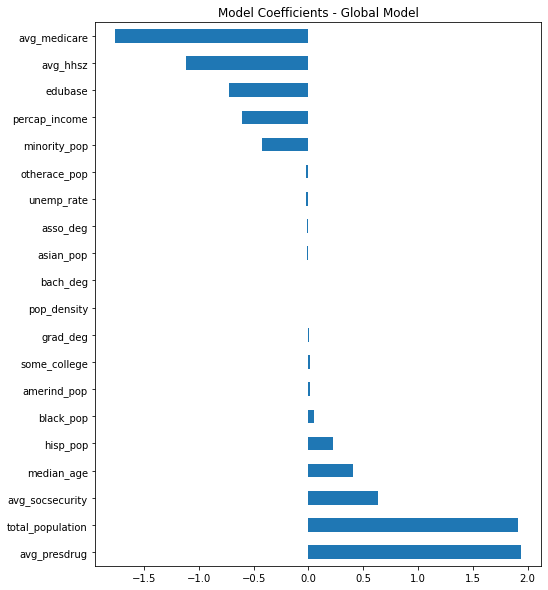

In [86]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
global_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Global Model')

__Regression Equation__

$
\begin{align}
provider\_count = 0.2005*minority\_pop + 0.2312*grad\_deg + 0.7350*total\_population + 0.8371*percap\_income \\ + 3.8329*avg\_medicare + 0.0806*asso\_deg + 0.0412*otherace\_pop + 0.0544*amerind\_pop +0.0640*asian\_pop \\ - 2.1234*avg\_hhsz - 0.9313*median\_age - 4.5444*avg\_presdrug - 0.7842*avg\_socsecurity-0.1044*black\_pop-0.1451*hisp\_pop
\end{align}
$

In [87]:
# Model Interpretation
coef = 1.9133
((1.01**coef)-1)*100

1.9220345662639637

> __Model Interpretations:__
1. `𝑚𝑖𝑛𝑜𝑟𝑖𝑡𝑦_𝑝𝑜𝑝` - The coefficient is 0.2005. We can say that for 1% increase in minority population, Provider Count will increase by 0.20% ((1.01^coef-1)*100) holding all other predictors fixed.
2. `grad_deg` - The coefficient is 0.2312. We can say that for 1% increase in graduate degree holders, Provider Count will increase by 0.23% holding all other predictors fixed.
3. `𝑡𝑜𝑡𝑎𝑙_𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛` - The coefficient is 0.735. We can say that for 1% increase in total population, Provider Count will increase by 0.735% holding all other predictors fixed.
4. `𝑝𝑒𝑟𝑐𝑎𝑝_𝑖𝑛𝑐𝑜𝑚𝑒` - The coefficient is 0.8371. We can say that for 1% increase in per capita income, Provider Count will increase by 0.84% holding all other predictors fixed.
5. `𝑎𝑣𝑔_𝑚𝑒𝑑𝑖𝑐𝑎𝑟𝑒` - The coefficient is 3.8329. We can say that for 1% increase in average medicare, Provider Count will increase by 3.83% holding all other predictors fixed.
6. `𝑎𝑠𝑠𝑜_𝑑𝑒𝑔` - The coefficient is 0.0806. We can say that for 1% increase in associate degree holders, Provider Count will increase by 0.08% holding all other predictors fixed.
7. `otherace_pop` - The coefficient is 0.0412. We can say that for 1% increase in other race population, Provider Count will increase by 0.04% holding all other predictors fixed.
8. `𝑎𝑚𝑒𝑟𝑖𝑛𝑑_𝑝𝑜𝑝` - The coefficient is 0.0544. We can say that for 1% increase in american indian population, Provider Count will increase by 0.05% holding all other predictors fixed.
9. `asian_pop` - The coefficient is 0.0640. We can say that for 1% increase in asian population, Provider Count will increase by 0.06% holding all other predictors fixed.
10. `avg_hhsz` - The coefficient is -2.1234. We can say that for 1% increase in average household size, Provider Count will decrease by 2.12% holding all other predictors fixed.
11. `median_age` - The coefficient is -0.9313. We can say that for 1% increase in median age, Provider Count will decrease by 0.93% holding all other predictors fixed.
12. `𝑎𝑣𝑔_𝑝𝑟𝑒𝑠𝑑𝑟𝑢𝑔` - The coefficient is -4.5444. We can say that for 1% increase in average prescription drug, Provider Count will decrease by 4.54% holding all other predictors fixed.
13. `𝑎𝑣𝑔_𝑠𝑜𝑐𝑠𝑒𝑐𝑢𝑟𝑖𝑡𝑦` - The coefficient is -0.7842. We can say that for 1% increase in average social security, Provider Count will decrease by 0.784% holding all other predictors fixed.
14. `black_pop` - The coefficient is -0.1044. We can say that for 1% increase in black population, Provider Count will decrease by 0.104% holding all other predictors fixed.
15. `ℎ𝑖𝑠𝑝_𝑝𝑜𝑝` - The coefficient is -0.1451. We can say that for 1% increase in hispanic population, Provider Count will decrease by 0.145% holding all other predictors fixed.

source for interpretation: https://www.cscu.cornell.edu/news/statnews/stnews83.pdf

In [88]:
# Calculate RMSE of global model
pred_val = global_ols.fittedvalues.copy()
new_rmse = rmse(train_y_log, pred_val)
new_rmse

0.14127669515944555

> We can see that the RMSE of our model is 0.14. Since RMSE has the same unit as the dependent variable, we can compare RMSE with the range of dependent variable to see how spread out our residuals are and see how fit our model is. A value of 0.14 on a range of 0-11 (dependent variable range) is pretty small showing the model is a good fit.

In [89]:
# Get confidence intervals
global_ols.conf_int(alpha=0.05, cols=None)

0         1
const             0.332792  2.527178
minority_pop     -0.435802 -0.403028
grad_deg         -0.014450  0.024481
total_population  1.648982  2.177656
avg_medicare     -2.220647 -1.304207
percap_income    -0.804100 -0.404716
asso_deg         -0.036587  0.002521
edubase          -0.977329 -0.466672
otherace_pop     -0.035722 -0.012502
pop_density      -0.014158  0.000294
avg_hhsz         -1.330302 -0.910491
unemp_rate       -0.032143 -0.008334
amerind_pop       0.011293  0.024273
median_age        0.254026  0.560977
some_college     -0.022529  0.047027
avg_presdrug      1.460222  2.419100
avg_socsecurity   0.451675  0.812004
asian_pop        -0.021629 -0.004444
bach_deg         -0.036418  0.020605
black_pop         0.041288  0.056347
hisp_pop          0.203495  0.235746

#### Verify Assumptions

Here we will verify regression assumptions again

In [90]:
# Residual Value
residual = global_ols.resid

((array([-3.50650989, -3.26308546, -3.12848867, ...,  3.12848867,
          3.26308546,  3.50650989]),
  array([-2.04394238, -1.41068676, -1.26281866, ...,  0.49993672,
          0.55359272,  0.60123363])),
 (0.1252265293819121, 9.69856918896596e-14, 0.8854732485836198))

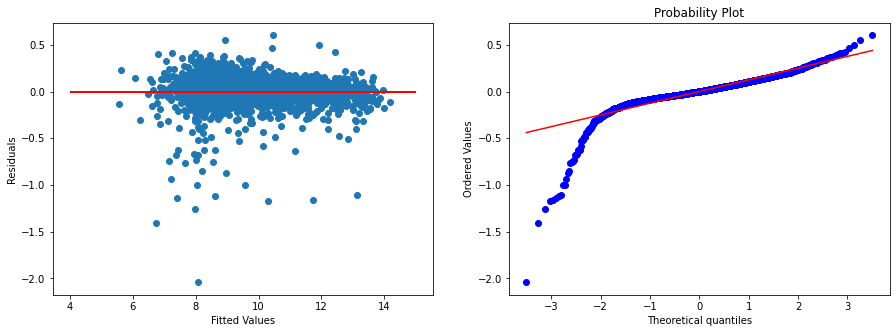

In [91]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=4, xmax=15, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

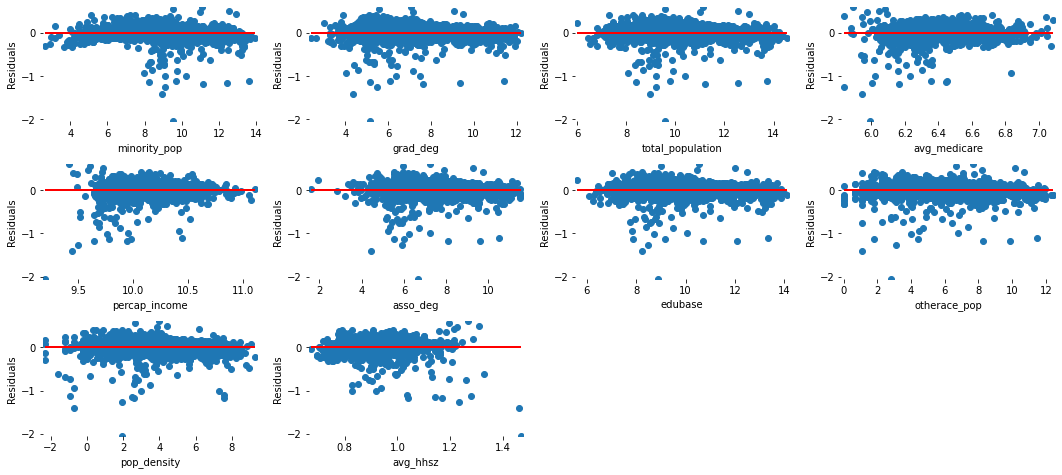

In [92]:
# Residuals vs Predictors
states = train_x_log.columns
fig = plt.figure(figsize=(15, 15))

for sp in range(0,10):
    mini = min(train_x_log.loc[:,states[sp]])
    maxi = max(train_x_log.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x_log.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we still observe a departure from constant variance as the distance of data points from zero line is not consistent. We can see that the variation in residuals is high initially and then starts to drop.
    - **Independence**:  We see that the data is randomly distributed along the zero line indicating the independence holds.


2. Probability Plot
    - **Normality**: From this plot, we see that the residuals follow straight line with departure at the tails. Normality assumption does not hold.


3. Residuals vs Predictors Plot
    - **Linearity**: From the plot, we can see that the residuals for each predictor variable are randomly distributed accross the 0 line. We can say that the linearity assumption holds.

## Spatial Models - Setup

Let's build some spatial models like `GWR`, `Forest based CART` and `LBR` to understand how provider count is influenced by different factors at county level. Before we build these models, let's import libraries, define an output directory and create an environment workspace.

In [1]:
# Import Libraries
import arcpy
import os

In [2]:
# Set data directory to output results
# arcgis_dir = os.path.abspath(os.path.join(os.sep, 'arcgis'))
# home_dir = os.path.join(arcgis_dir, 'home')

arcgis_dir = './arcgis'
home_dir = os.path.join(arcgis_dir, 'home')

print(f"root dir: {arcgis_dir}")
print(f"home dir: {home_dir}")

root dir: ./arcgis
home dir: ./arcgis\home


In [97]:
# Create empty FGDB in data directory
arcpy.CreateFileGDB_management(home_dir, 'Results.gdb')

<Result './home\\Results.gdb'>

In [98]:
# Setup Workspace
arcpy.env.workspace = os.path.join(home_dir,'Results.gdb')
arcpy.env.workspace

'./home\\Results.gdb'

## Geographically Weighted Regression (GWR) Model

The global model helps us identify a relationship between predictor variables and provider count at the country level. However, the dynamics of how different variables impact provider count can be very different for different counties within a state. The question we ask here is:

`What if an influential variable's impact on provider count varies accross different counties, i.e. how does average household size (or any other variable's) impact provider count vary across different counties?`

To answer this question we will explore `Geographically Weighted Regression Model`. 

Learn more about [Geographically Weighted Regression](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/geographicallyweightedregression.htm).

### Run GWR Model

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase in `/arcgis/home` which can then be accessed to visualize the results.

In [101]:
# Run GWR and output results to the FGDB
from arcpy.stats import GWR

# Workspace
arcpy.env.workspace

# Url for the layer
lyr_url = allprovider_layer.url

# Define model variables
in_features = lyr_url
dependent_variable = 'provider_count'
model_type = 'CONTINUOUS'
explanatory_variables = "asian_pop;amerind_pop;avg_hhsz;black_pop;hisp_pop;median_age;minority_pop; otherace_pop;percap_income;unemp_rate;white_pop;some_college;grad_deg;avg_healthinsurance;avg_medicare;avg_labtest;avg_presdrug;avg_personalinsurance"
output_features = 'GWRResults_NB'
neighborhood_type = 'NUMBER_OF_NEIGHBORS'
neighborhood_selection_method = 'USER_DEFINED'
minimum_number_of_neighbors = None
maximum_number_of_neighbors = None
minimum_search_distance = None
maximum_search_distance = None
number_of_neighbors_increment = None
search_distance_increment = None
number_of_increments = None
number_of_neighbors = 50
distance_band = None
prediction_locations = None
explanatory_variables_to_match = None
output_predicted_features = None
robust_prediction = 'ROBUST'
local_weighting_scheme = 'GAUSSIAN'
coefficient_raster_workspace = None

# Run Model
GWR(in_features, dependent_variable, model_type, explanatory_variables, output_features, neighborhood_type,
    neighborhood_selection_method, minimum_number_of_neighbors, maximum_number_of_neighbors, minimum_search_distance,
    maximum_search_distance, number_of_neighbors_increment, search_distance_increment, number_of_increments,
    number_of_neighbors, distance_band, prediction_locations, explanatory_variables_to_match, output_predicted_features,
    robust_prediction, local_weighting_scheme,coefficient_raster_workspace)

<Result './home\\Results.gdb\\GWRResults_NB'>

### Access GWR Results as Spatially Enabled Dataframe

In [102]:
# Access GWR data from local
gwr_df = pd.DataFrame.spatial.from_featureclass(os.path.join(arcpy.env.workspace,output_features))
gwr_df.head()

OBJECTID  SOURCE_ID  provider_count  asian_pop  amerind_pop  avg_hhsz  \
0         1          1              33         33           26      2.42   
1         2          2             407        101          112      2.37   
2         3          3              54         51           53      2.35   
3         4          4             158         26           19      2.40   
4         5          5            1444       1882          501      2.38   

   black_pop  hisp_pop  median_age  minority_pop  otherace_pop  percap_income  \
0        201        91        43.2           467             5          20870   
1       2000       540        44.7          3456           106          20953   
2       1044       479        39.0          1720           209          20296   
3        118       171        46.9           453            82          21869   
4       1953      5716        41.6         11180          2234          30109   

   unemp_rate  white_pop  some_college  grad_deg  avg_healthinsurance  \
0         5.8       8454          1048       368              2894.59   
1         4.7      42649          5473      1731              2763.71   
2         7.6       6772          1272       460              2716.19   
3         3.8      12092          1270       655              2848.84   
4         2.1      95613         14708      5425              3469.30   

   avg_medicare  avg_labtest  avg_presdrug  avg_personalinsurance  \
0        632.30        52.65        132.74                 270.40   
1        592.84        49.59        124.51                 257.88   
2        579.07        47.76        122.37                 248.70   
3        596.32        50.31        125.52                 272.29   
4        594.38        57.14        124.23                 357.65   

       INTRCPT   SE_INTRCPT  C_ASIAN_POP  SE_ASIAN_POP  C_AMERIND_POP  \
0  2269.229882  1765.502028    -0.205103      0.050978      -0.443802   
1   823.167039  1973.306652    -0.442339      0.068027      -0.367468   
2  1679.307355  1808.235751    -0.257964      0.053790      -0.343582   
3  4650.266702  1751.962559     0.103447      0.051772      -0.010198   
4 -1202.288579  2307.747761    -0.176166      0.074332       0.053691   

   SE_AMERIND_POP   C_AVG_HHSZ  SE_AVG_HHSZ  C_BLACK_POP  SE_BLACK_POP  \
0        0.065601  -336.092972   718.162295    -0.107186      0.044346   
1        0.060400    35.733271   825.276760    -0.323588      0.058258   
2        0.055568  -201.410066   738.915077    -0.156758      0.046702   
3        0.065673 -1786.645010   784.333958     0.201057      0.045718   
4        0.097344   958.527317   887.660415    -0.112266      0.070326   

   C_HISP_POP  SE_HISP_POP  C_MEDIAN_AGE  SE_MEDIAN_AGE  C_MINORITY_POP  \
0   -0.138663     0.045863    -13.313946      22.816967        0.142949   
1   -0.496430     0.064091    -13.328935      22.962000        0.334714   
2   -0.218335     0.049422    -12.486067      22.558775        0.187933   
3    0.238298     0.044973     22.564080      22.763160       -0.140379   
4   -0.126718     0.057260    -12.211879      20.766322        0.138638   

   SE_MINORITY_POP  C_OTHERACE_POP  SE_OTHERACE_POP  C_PERCAP_INCOME  \
0         0.044477       -0.135751         0.042066        -0.005897   
1         0.058235        0.236552         0.054778         0.036394   
2         0.046683       -0.068523         0.043413         0.006322   
3         0.047512       -0.290970         0.037719        -0.144592   
4         0.068409       -0.061620         0.045901         0.182483   

   SE_PERCAP_INCOME  C_UNEMP_RATE  SE_UNEMP_RATE  C_WHITE_POP  SE_WHITE_POP  \
0          0.063295    -13.988308      27.612420     0.002913      0.003138   
1          0.073868     -4.893097      25.196242    -0.003610      0.004210   
2          0.066412    -10.664762      27.175348     0.000757      0.003477   
3          0.056420    -10.766647      27.801941     0.027481      0.002527   
4          0.081982    -45.102335      31.

In [103]:
gwr_df.shape

(3142, 67)

### Plot GWR Results

#### Plot Average Household Size


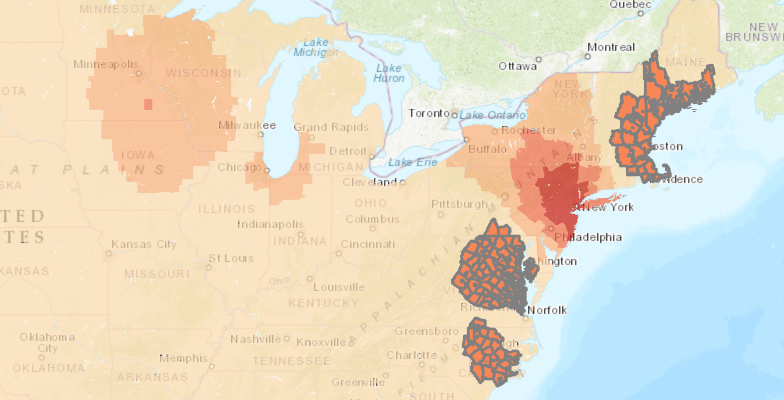

In [106]:
# Create Map
gwr_avg_hhsz_map = gis.map('Washington DC', 5)
gwr_avg_hhsz_map

> The map shows how provider count varies with average household size for different counties. We can see:
- Counties in New York, New Jersey and Philadelphia where an increase in average household size will have a higher impact on provider count.
- Similarly, for counties in Washington, Virginia, Maine, New Hampshire, Massachusetts an increase in average household size will have a higher impact on provider count.
- In the Midwest, areas near Chicago and Minneapolis also see a higher impact on provider count.

In [105]:
gwr_avg_hhsz_map.remove_layers()
gwr_df.spatial.plot(map_widget=gwr_avg_hhsz_map,
        renderer_type='c',  # for class breaks renderer
        method='esriClassifyNaturalBreaks',  # classification algorithm
        class_count=6,  # choose the number of classes
        col='C_AVG_HHSZ',  # numeric column to classify
        cmap='OrRd',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0) # specify opacity

True

In [20]:
# Add Legend
gwr_avg_hhsz_map.legend = True

#### Plot Average Prescription Drug

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)


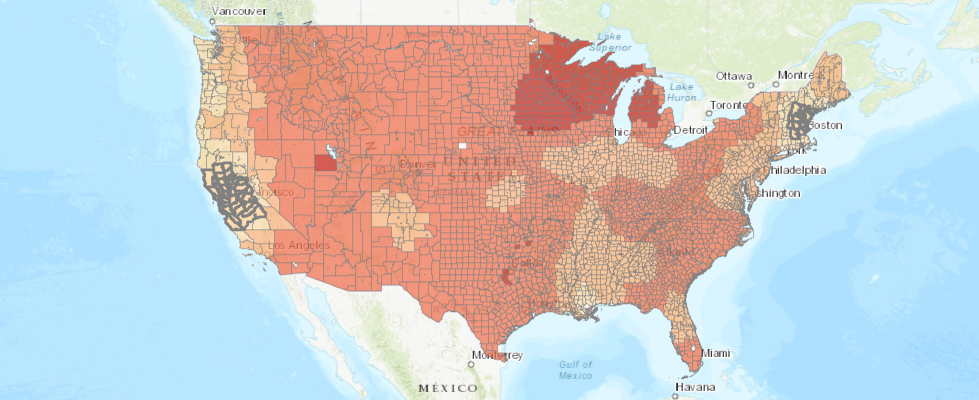

In [26]:
# Create Map
gwr_avg_presdrug_map = gis.map('USA', 4)
gwr_avg_presdrug_map

> The map shows how provider count varies with average prescription drug prices for different counties. We can see:
- Provider Count in majority of California and areas in New Hampshire is strongly negatively impacted by increase in average prescription drug prices. This means increase in average prescription drug prices will reduce provider count
- For areas in Minnesota and Wisconsin, provider count is strongly positively impacted by increase in average prescription drug prices.This means increase in average prescription drug prices will increase provider count
- Although for majority of midwest, provider count is positively impacted by average prescription drug prices, some counties in North New Mexico, Southern Colorado and Kansas seem to have a slight negative impact.

In [27]:
gwr_avg_presdrug_map.remove_layers()
gwr_df.spatial.plot(map_widget=gwr_avg_presdrug_map,
        renderer_type='c',  # for class breaks renderer
        method='esriClassifyNaturalBreaks',  # classification algorithm
        class_count=6,  # choose the number of classes
        col='C_AVG_PRESDRUG',  # numeric column to classify
        cmap='OrRd',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [28]:
gwr_avg_presdrug_map.legend = True

## Forest Based Classification and Regression Trees Model

The global model and GWR model are parametric models and they assume either a linear relationship between predictors and response variable or assume a form of the function and identify influential factors at the country level and at county level. These methods are easy to understand however, are highly constrained to the specified form. But:

`What if this relationship between predictors and response is not linear? OR What if we do not make strong assumptions about the form of function?`

To answer this question, we will explore a non-parametric technique called `Forest Based Classification and Regression Trees Model`. Forest based models are good black box models that map non-linear and complex relationships quite well and are not influenced by outliers and missing values to an extent.

Forest Based Classification and Regression Trees creates an ensemble of decision trees. Each decision tree is created using randomly generated portions of data. Each tree generates its own prediction and votes on an outcome. The forest model considers votes from all decision trees to predict or classify the outcome. The model will output a variable importance table to identify importance of each variable given to the model.

Leran more about [Forest Based Classification and Regression Trees](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/forestbasedclassificationregression.htm).

### Build RF Model

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

Here, we created a 'Train Only' model with all predictors. This model has 100 tress with 100% data for each tree and 30% data excluded for validation. The model was run for 5 iterations.

In [107]:
from arcpy.stats import Forest

# Workspace
arcpy.env.workspace
lyr_url = allprovider_layer.url
print(lyr_url)

# Define model variables
prediction_type = 'TRAIN'
in_features = lyr_url
variable_predict = 'provider_count'
treat_variable_as_categorical = None
explanatory_variables = "amerind_pop false;asian_pop false;asso_deg false;avg_healthcare false;avg_healthinsurance false;avg_hhinc false;avg_hhsz false;avg_labtest false;avg_medicalcare false;avg_medicalsrvc false;avg_medicare false;avg_personalinsurance false;avg_presdrug false;avg_socsecurity false;bach_deg false;black_pop false;grad_deg false;hisp_pop false;median_age false;minority_pop false;otherace_pop false;percap_income false;pop_density false;some_college false;unemp_rate false;white_pop false"
distance_features = None
explanatory_rasters = None
features_to_predict = None
output_features = None
output_raster = None
explanatory_variable_matching = None
explanatory_distance_matching = None
explanatory_rasters_matching = None
output_trained_features = 'RF_Output_Result'
output_importance_table = 'RF_VImp_Result'
use_raster_values = True
number_of_trees = 100
minimum_leaf_size = None
maximum_depth = None
sample_size = 100
random_variables = None
percentage_for_training = 30
output_classification_table = None
output_validation_table = None
compensate_sparse_categories = False
number_validation_runs = 5
calculate_uncertainty = False

# Run Model
Forest(prediction_type,in_features, variable_predict, treat_variable_as_categorical, explanatory_variables, distance_features, 
       explanatory_rasters, features_to_predict, output_features, output_raster, explanatory_variable_matching,
      explanatory_distance_matching, explanatory_rasters_matching, output_trained_features, output_importance_table,
      use_raster_values, number_of_trees, minimum_leaf_size, maximum_depth, sample_size, random_variables, 
       percentage_for_training, output_classification_table, output_validation_table, compensate_sparse_categories, 
       number_validation_runs, calculate_uncertainty)


https://datascienceqa.esri.com/server/rest/services/Hosted/aafe50/FeatureServer/0


<Result ''>

### Get Variable Importance

In [108]:
# RF Vimp Table
rf_df = pd.DataFrame.spatial.from_table(os.path.join(arcpy.env.workspace,output_importance_table))
rf_df.head()

OBJECTID   AMERIND_POP     ASIAN_POP      ASSO_DEG      AVG_HHSZ  \
0         1  1.344903e+09  5.423667e+09  1.142295e+10  3.266440e+08   
1         2  5.060280e+08  4.202558e+09  5.810500e+09  3.159052e+08   
2         3  9.060326e+08  2.466705e+09  1.153475e+10  2.513476e+08   
3         4  2.166458e+08  1.564095e+09  8.441282e+09  3.020065e+08   
4         5  2.350210e+09  2.956201e+09  9.003262e+09  2.351308e+08   

      AVG_HHINC      BACH_DEG     BLACK_POP      GRAD_DEG      HISP_POP  \
0  1.447271e+08  2.597887e+10  1.378238e+09  2.031073e+10  2.391649e+09   
1  1.115996e+08  1.757619e+10  5.149440e+09  1.561572e+10  1.089628e+09   
2  1.308940e+08  1.740622e+10  1.934322e+09  2.035838e+10  1.986008e+09   
3  9.663218e+07  1.571694e+10  4.045907e+08  1.742508e+10  9.499433e+08   
4  6.522093e+07  2.008704e+10  2.821634e+09  1.869243e+10  3.050743e+09   

     MEDIAN_AGE  MINORITY_POP  OTHERACE_POP  PERCAP_INCOME   POP_DENSITY  \
0  1.834280e+08  5.947080e+09  2.860453e+09   9.567461e+07  1.040264e+09   
1  1.194411e+08  5.302775e+09  1.294531e+09   1.159544e+08  4.709663e+08   
2  1.485019e+08  7.600501e+09  1.746472e+09   9.879890e+07  4.137354e+08   
3  1.346317e+08  3.975647e+09  1.999523e+09   2.443858e+08  7.015495e+08   
4  1.627265e+08  1.031060e+10  4.266963e+09   5.805037e+07  4.198681e+08   

   SOME_COLLEGE    UNEMP_RATE     WHITE_POP  AVG_PERSONALINSURANCE  \
0  1.092602e+10  1.799771e+08  1.158130e+10           1.410105e+08   
1  8.684408e+09  3.028040e+08  9.178675e+09           1.078266e+08   
2  1.517582e+10  2.167376e+08  1.142075e+10           7.847702e+07   
3  7.425889e+09  1.214082e+08  1.164077e+10           1.372590e+08   
4  1.061247e+10  1.515298e+08  1.179751e+10           1.434085e+08   

   AVG_SOCSECURITY  AVG_HEALTHCARE  AVG_HEALTHINSURANCE  AVG_MEDICARE  \
0     2.098273e+08    1.371212e+08         8.392425e+07  7.611271e+07   
1     1.887767e+08    1.081513e+08         4.667298e+07  1.829497e+08   
2     1.270230e+08    1.287203e+08         1.051697e+08  1.356447e+08   
3     1.363644e+08    7.422435e+07         6.613706e+07  1.435905e+08   
4     1.021653e+08    7.159550e+07         9.980113e+07  1.274591e+08   

   AVG_MEDICALCARE  AVG_MEDICALSRVC   AVG_LABTEST  AVG_PRESDRUG  \
0     1.227398e+08     7.044162e+07  2.239328e+08  6.726567e+07   
1     1.309066e+08     1.119114e+08  2.221386e+08  2.087548e+08   
2     1.404327e+08     1.746947e+08  1.603734e+08  3.486225e+08   
3     7.321778e+07     1.072176e+08  1.816007e+08  1.389330e+08   
4     1.346747e+08     1.121947e+08  2.131233e+08  4.547376e+08   

         BEST_ITE  
0      Iterations  
1  Best Iteration  
2      Iterations  
3      Iterations  
4      Iterations

In [109]:
rf_df.shape

(5, 28)

### Plot Variable Importance

In [110]:
data = rf_df.drop(['OBJECTID','BEST_ITE'],axis=1)
data

AMERIND_POP     ASIAN_POP      ASSO_DEG      AVG_HHSZ     AVG_HHINC  \
0  1.344903e+09  5.423667e+09  1.142295e+10  3.266440e+08  1.447271e+08   
1  5.060280e+08  4.202558e+09  5.810500e+09  3.159052e+08  1.115996e+08   
2  9.060326e+08  2.466705e+09  1.153475e+10  2.513476e+08  1.308940e+08   
3  2.166458e+08  1.564095e+09  8.441282e+09  3.020065e+08  9.663218e+07   
4  2.350210e+09  2.956201e+09  9.003262e+09  2.351308e+08  6.522093e+07   

       BACH_DEG     BLACK_POP      GRAD_DEG      HISP_POP    MEDIAN_AGE  \
0  2.597887e+10  1.378238e+09  2.031073e+10  2.391649e+09  1.834280e+08   
1  1.757619e+10  5.149440e+09  1.561572e+10  1.089628e+09  1.194411e+08   
2  1.740622e+10  1.934322e+09  2.035838e+10  1.986008e+09  1.485019e+08   
3  1.571694e+10  4.045907e+08  1.742508e+10  9.499433e+08  1.346317e+08   
4  2.008704e+10  2.821634e+09  1.869243e+10  3.050743e+09  1.627265e+08   

   MINORITY_POP  OTHERACE_POP  PERCAP_INCOME   POP_DENSITY  SOME_COLLEGE  \
0  5.947080e+09  2.860453e+09   9.567461e+07  1.040264e+09  1.092602e+10   
1  5.302775e+09  1.294531e+09   1.159544e+08  4.709663e+08  8.684408e+09   
2  7.600501e+09  1.746472e+09   9.879890e+07  4.137354e+08  1.517582e+10   
3  3.975647e+09  1.999523e+09   2.443858e+08  7.015495e+08  7.425889e+09   
4  1.031060e+10  4.266963e+09   5.805037e+07  4.198681e+08  1.061247e+10   

     UNEMP_RATE     WHITE_POP  AVG_PERSONALINSURANCE  AVG_SOCSECURITY  \
0  1.799771e+08  1.158130e+10           1.410105e+08     2.098273e+08   
1  3.028040e+08  9.178675e+09           1.078266e+08     1.887767e+08   
2  2.167376e+08  1.142075e+10           7.847702e+07     1.270230e+08   
3  1.214082e+08  1.164077e+10           1.372590e+08     1.363644e+08   
4  1.515298e+08  1.179751e+10           1.434085e+08     1.021653e+08   

   AVG_HEALTHCARE  AVG_HEALTHINSURANCE  AVG_MEDICARE  AVG_MEDICALCARE  \
0    1.371212e+08         8.392425e+07  7.611271e+07     1.227398e+08   
1    1.081513e+08         4.667298e+07  1.829497e+08     1.309066e+08   
2    1.287203e+08         1.051697e+08  1.356447e+08     1.404327e+08   
3    7.422435e+07         6.613706e+07  1.435905e+08     7.321778e+07   
4    7.159550e+07         9.980113e+07  1.274591e+08     1.346747e+08   

   AVG_MEDICALSRVC   AVG_LABTEST  AVG_PRESDRUG  
0     7.044162e+07  2.239328e+08  6.726567e+07  
1     1.119114e+08  2.221386e+08  2.087548e+08  
2     1.746947e+08  1.603734e+08  3.486225e+08  
3     1.072176e+08  1.816007e+08  1.389330e+08  
4     1.121947e+08  2.131233e+08  4.547376e+08

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

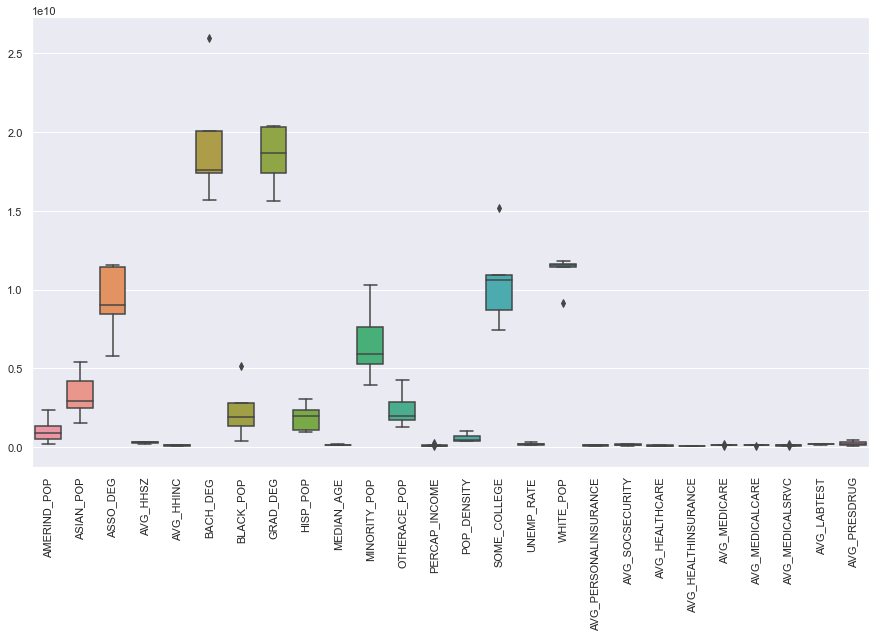

In [111]:
sns.set(rc={'figure.figsize':(15,8.27)})
data = rf_df.drop(['OBJECTID','BEST_ITE'],axis=1)
g = sns.boxplot(data = data)
# g = sns.boxplot(data = rf_df.iloc[:,:-2])
plt.xticks(rotation=90)

> We ran 5 iterations of Random Forest model. The box plot shows variable importance of each variable and how importance varies for each iteration.

#### Plot Best Iteration

In [112]:
# Create dataframe for Best Iteration
best = rf_df[rf_df['BEST_ITE']=='Best Iteration']
best

OBJECTID   AMERIND_POP     ASIAN_POP      ASSO_DEG      AVG_HHSZ  \
1         2  5.060280e+08  4.202558e+09  5.810500e+09  3.159052e+08   

      AVG_HHINC      BACH_DEG     BLACK_POP      GRAD_DEG      HISP_POP  \
1  1.115996e+08  1.757619e+10  5.149440e+09  1.561572e+10  1.089628e+09   

     MEDIAN_AGE  MINORITY_POP  OTHERACE_POP  PERCAP_INCOME   POP_DENSITY  \
1  1.194411e+08  5.302775e+09  1.294531e+09   1.159544e+08  4.709663e+08   

   SOME_COLLEGE    UNEMP_RATE     WHITE_POP  AVG_PERSONALINSURANCE  \
1  8.684408e+09  3.028040e+08  9.178675e+09           1.078266e+08   

   AVG_SOCSECURITY  AVG_HEALTHCARE  AVG_HEALTHINSURANCE  AVG_MEDICARE  \
1     1.887767e+08    1.081513e+08         4.667298e+07  1.829497e+08   

   AVG_MEDICALCARE  AVG_MEDICALSRVC   AVG_LABTEST  AVG_PRESDRUG  \
1     1.309066e+08     1.119114e+08  2.221386e+08  2.087548e+08   

         BEST_ITE  
1  Best Iteration

Text(0.5, 1.0, 'Variable Importance - Best Iteration')

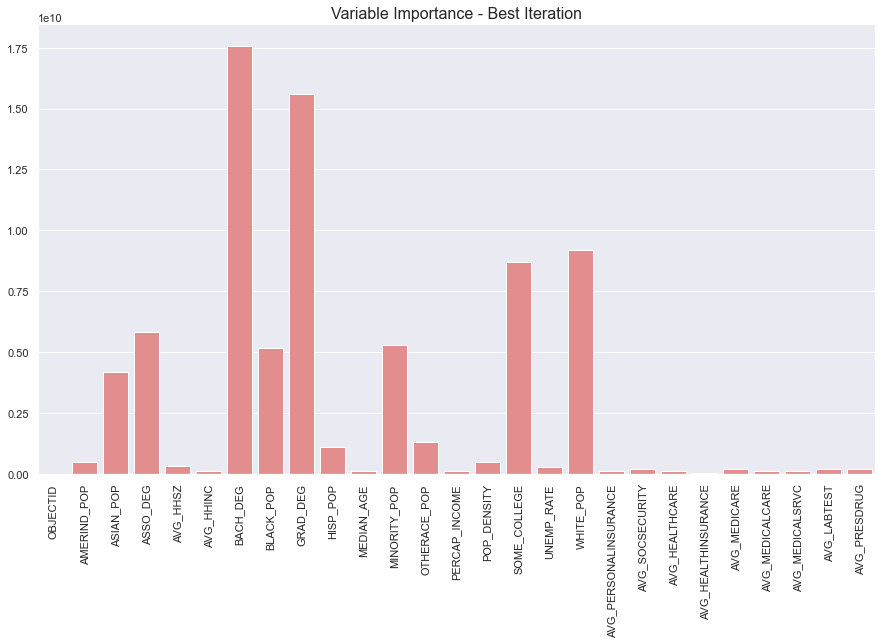

In [113]:
# Create Plot
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(data=best, color='lightcoral')
plt.xticks(rotation=90)
plt.title('Variable Importance - Best Iteration', fontsize=16)

> The barplot shows variable importance of each variable for the best iteration. These variables will now be used in the next step of our analysis to understand how they vary with respect to provider count accross various counties in U.S.

## Local Bivariate Relationships (LBR) Model

Random Forest model generates variable importance and gives us important variables. However, this model does not tell us:
- the type of relationship and 
- significance of relation of a predictor variable with respect to provider count.

To understand the type and significance of the relations of a predictor variable with respect to provider count at the County level, we will explore `Local Bivariate Relations Model`.

Local Bivariate Relations analyzes two variables for statistically significant relationships using local entropy. The output can be used to visualize the type of relationship between two variables and explore how their relationship changes across counties.

We will use Local Bivariate Relations to study how relationship of important variables determined by Random Forest model change with respect to Provider Count accross various counties. 

Learn more about [Local Bivariate Relationships](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/localbivariaterelationships.htm).


### Build Model - Provider Count and White Population

To run our analysis, we will use the cleaned demographic and health expenditure data layer `demographic_healthexp_clean_allproviders`. The output of the model will be stored in a file geodatabase which can then be accessed to visualize the results.

In [114]:
from arcpy.stats import LocalBivariateRelationships

# Workspace
arcpy.env.workspace

# Get url of layer
lyr_url = allprovider_layer.url

# Define model variables
in_features = lyr_url
dependent_variable = 'provider_count'
explanatory_variable = 'white_pop'
output_features = 'allprovider_white_pop_LBR_Results'
number_of_neighbors = 50
number_of_permutations = 99
enable_local_scatterplot_popups = 'NO_POPUP'
level_of_confidence = '95%'
apply_false_discovery_rate_fdr_correction = 'APPLY_FDR'
scaling_factor = 0.5

# Run Model
LocalBivariateRelationships(in_features, dependent_variable,explanatory_variable,output_features,number_of_neighbors,
                           number_of_permutations, enable_local_scatterplot_popups, level_of_confidence, 
                            apply_false_discovery_rate_fdr_correction, scaling_factor)

<Result './home\\Results.gdb\\allprovider_white_pop_LBR_Results'>

#### Access Model Results as Spatially Enabled Dataframe

In [115]:
# Access GWR data from local
lbr_whitepop = pd.DataFrame.spatial.from_featureclass(os.path.join(arcpy.env.workspace,output_features))
lbr_whitepop.head()

OBJECTID  SOURCE_ID  provider_count  white_pop   ENTROPY  PVALUES  \
0         1          1              33       8454  0.203431     0.01   
1         2          2             407      42649  0.185886     0.01   
2         3          3              54       6772  0.188381     0.01   
3         4          4             158      12092  0.238461     0.01   
4         5          5            1444      95613  0.340082     0.01   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1  P_COEF_2  \
0  95% Confidence  -0.000745  0.559401   -0.001318  0.714402 -4.781463   
1  95% Confidence  -0.001423  0.692456   -0.000729  0.488255  7.869873   
2  95% Confidence  -0.001584  0.746315   -0.001034  0.580219  6.580686   
3  95% Confidence  -0.000238  0.482395   -0.000428  0.522848 -1.034606   
4  95% Confidence  -0.005112  0.791441    0.001286  0.150287  6.708427   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -471.412203  0.822114 -471.643374  0.827529       **        **_   
1 -478.174962  0.811742 -479.396893  0.821054       **        _**   
2 -492.140300  0.877575 -493.309822  0.883508       **        ***   
3 -437.707305  0.670627 -435.495987  0.664666       _*        _*_   
4 -344.866564  0.878265 -376.743713  0.937322       **        __*   

          LBR_TYPE                                              SHAPE  
0  Positive Linear  {"rings": [[[-8966174.952599999, 4783327.06540...  
1  Positive Linear  {"rings": [[[-9053514.3498, 4605160.997300006]...  
2  Positive Linear  {"rings": [[[-8986636.588199994, 4735386.19310...  
3  Positive Linear  {"rings": [[[-8792002.2509, 4755765.979600005]...  
4           Convex  {"rings": [[[-9814179.003599996, 5448666.45110...

In [116]:
lbr_whitepop.shape

(3142, 20)

In [117]:
# Counts of different relationship types
lbr_whitepop.LBR_TYPE.value_counts()

Convex             1940
Positive Linear    1048
Concave             154
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


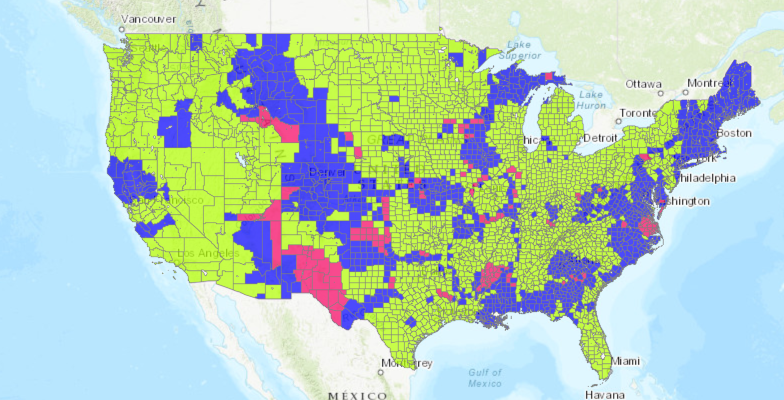

In [120]:
# Create Map
lbr_whitepop_map = gis.map('USA', 4)
lbr_whitepop_map

> The map shows how relationship of provider count varies with white population for different counties. We can see:
- For most of the counties in United States, the relationship is either Convex or Positive Linear which means that provider count increase with increasing white population either linearly or polynomially.
- Southern parts of New Mexico, some counties in North Texas, Wyoming and Idaho have a concave relationship. This means that provider count increases to a certain extent and then plateaus off at some point.

In [119]:
lbr_whitepop_map.remove_layers()
lbr_whitepop.spatial.plot(map_widget=lbr_whitepop_map,
        renderer_type='u',  # for class breaks renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='prism',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [20]:
lbr_whitepop_map.legend = True

### Build Model - Provider Count and Graduate Degree

In [121]:
from arcpy.stats import LocalBivariateRelationships

# Workspace
arcpy.env.workspace

# Get url of layer
lyr_url = allprovider_layer.url

# Define model variables
in_features = lyr_url
dependent_variable = 'provider_count'
explanatory_variable = 'grad_deg'
output_features = 'allprovider_grad_deg_LBR_Results'
number_of_neighbors = 50
number_of_permutations = 99
enable_local_scatterplot_popups = 'NO_POPUP'
level_of_confidence = '95%'
apply_false_discovery_rate_fdr_correction = 'APPLY_FDR'
scaling_factor = 0.5

# Run Model
LocalBivariateRelationships(in_features, dependent_variable,explanatory_variable,output_features,number_of_neighbors,
                           number_of_permutations, enable_local_scatterplot_popups, level_of_confidence, 
                            apply_false_discovery_rate_fdr_correction, scaling_factor)

<Result './home\\Results.gdb\\allprovider_grad_deg_LBR_Results'>

#### Access Model Results as Spatially Enabled Dataframe

In [122]:
# Access GWR data from local
lbr_graddeg = pd.DataFrame.spatial.from_featureclass(os.path.join(arcpy.env.workspace,output_features))
lbr_graddeg.head()

OBJECTID  SOURCE_ID  provider_count  grad_deg   ENTROPY  PVALUES  \
0         1          1              33       368  0.154684     0.01   
1         2          2             407      1731  0.168417     0.01   
2         3          3              54       460  0.149569     0.01   
3         4          4             158       655  0.219042     0.01   
4         5          5            1444      5425  0.312070     0.01   

          LBR_SIG  INTERCEPT    COEF_1  PINTERCEPT  P_COEF_1   P_COEF_2  \
0  99% Confidence   0.000158  1.028060   -0.000386  1.400946 -19.819802   
1  99% Confidence   0.000291  0.916679   -0.000113  1.224014 -17.646920   
2  99% Confidence  -0.000077  1.163936   -0.000276  1.309035  -8.439474   
3  99% Confidence   0.001943  0.328030   -0.000066  0.933488  -7.958177   
4  99% Confidence   0.001053  0.807605   -0.000736  1.141077  -3.405850   

         AICC        R2      P_AICc      P_R2 SIG_COEF P_SIG_COEF  \
0 -515.452174  0.926275 -522.447906  0.937564       _*        _**   
1 -464.190261  0.750986 -463.762957  0.755366       _*        _*_   
2 -554.183178  0.964603 -554.828176  0.965963       _*        _**   
3 -428.261104  0.602134 -463.937152  0.810137       **        _**   
4 -337.166706  0.857997 -338.382561  0.865005       _*        _**   

          LBR_TYPE                                              SHAPE  
0          Concave  {"rings": [[[-8966174.952599999, 4783327.06540...  
1  Positive Linear  {"rings": [[[-9053514.3498, 4605160.997300006]...  
2  Positive Linear  {"rings": [[[-8986636.588199994, 4735386.19310...  
3          Concave  {"rings": [[[-8792002.2509, 4755765.979600005]...  
4  Positive Linear  {"rings": [[[-9814179.003599996, 5448666.45110...

In [123]:
lbr_graddeg.shape

(3142, 20)

In [124]:
lbr_graddeg.LBR_TYPE.value_counts()

Positive Linear    1177
Convex             1083
Concave             882
Name: LBR_TYPE, dtype: int64

#### Plot Results on Map


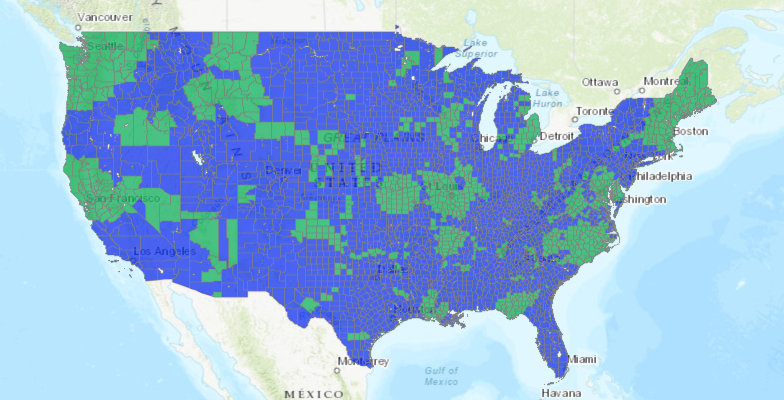

In [129]:
# Create Map
lbr_graddeg_map = gis.map('USA', 4)
lbr_graddeg_map

> The map shows how relationship of provider count varies with graduate degree holders for different counties. We can see:
- Majority of the counties from North Dakota to Texas share a Convex or Positive Linear relation. This means that provider count increase with increasing graduate degree holders for these counties either linearly or polynomially.
- Majority of East and West coast share a concave relation whcih means that provider count increases with graduater degree holders to a certain extent and then plateaus off at some point.

In [128]:
lbr_graddeg_map.remove_layers()
lbr_graddeg.spatial.plot(map_widget=lbr_graddeg_map,
        renderer_type='u',  # for unique value renderer
        col='LBR_TYPE',  # numeric column to classify
        cmap='prism',  # color map to pick colors from for each class
        alpha=0.7,
        line_width=0.05) # specify opacity

True

In [32]:
lbr_graddeg_map.legend = True

## Summary

To summarize, we:

1. Started with a `Base (OLS) Regression model` using all predictors:
 - Performed feature selection using `Lasso regularization` technique.
 - Created a `Global (OLS) Regression model` using selected features.
The Global model helped us identify relationship between predictor variables and provider count at the country level.


2. Next we created a `Geographically Weighted Regression (GWR) model`, to understand how different variables impact provider count accross different counties.
 - Here we plotted how provider count varies with average prescription drug prices and average household size across different counties.


3. To investigate non-linear relationship, we explored a non-parametric technique called `Forest Based Classification and Regression Trees model`.
 - The model returned `variable importance` of each variable. 


4.  To understand the type and significance of relationship of an individual predictor  with respect to provider count, we created a `Local Bivariate Relations Model`.


## Conclusion

To conclude, this 4 part study shows:
1. Variation of Overall, OB-GYN and Mental healthcare provider supply across different geographical areas. 


2. Summarizes most distinctive and relevant socio-demographic features predictive of a community’s provider shortages. 


3. Could help healthcare leaders:
 - better understand social determinants of health in their geographies.
 - prioritize interventions around addressing underserved areas.